<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Задача</h1>

Установите параметры для построения автоматизированной системы, отслеживающей аномалии и мошеннические действия (среднее, медиана, зависимости).

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_haos = pd.read_csv('/Users/Alexander/Desktop/Juli_bag/Project_2/real_estate_data.csv')

 <div style="border:solid green 2px; padding: 14px">
<h1> Подготовка данных </h1>
    <p> 
        Посмотрим данные, заполним пропуски, поменяем тип, добавим нужные столбцы
    </p>
</div>

In [3]:
data_haos.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data_haos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
data_haos.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
#Поменяла местами столбцы исходя из их содержимого(по темам)
data = data_haos[['locality_name','rooms', 'total_area', 'living_area', 'kitchen_area',
       'ceiling_height', 'cityCenters_nearest', 'floor', 'floors_total','first_day_exposition', 
       'days_exposition', 'is_apartment', 'studio', 'open_plan','balcony', 'airports_nearest',
       'parks_around3000', 'parks_nearest','ponds_around3000', 'ponds_nearest','total_images', 'last_price']]
data.head()

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,cityCenters_nearest,floor,floors_total,first_day_exposition,...,studio,open_plan,balcony,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,last_price
0,Санкт-Петербург,3,108.0,51.0,25.0,2.70,16028.0,8,16.0,2019-03-07T00:00:00,...,False,False,NaN,18863.0,1.0,482.0,2.0,755.0,20,13000000.0
1,посёлок Шушары,1,40.4,18.6,11.0,NaN,18603.0,1,11.0,2018-12-04T00:00:00,...,False,False,2.0,12817.0,0.0,NaN,0.0,NaN,7,3350000.0
2,Санкт-Петербург,2,56.0,34.3,8.3,NaN,13933.0,4,5.0,2015-08-20T00:00:00,...,False,False,0.0,21741.0,1.0,90.0,2.0,574.0,10,5196000.0
3,Санкт-Петербург,3,159.0,NaN,NaN,NaN,6800.0,9,14.0,2015-07-24T00:00:00,...,False,False,0.0,28098.0,2.0,84.0,3.0,234.0,0,64900000.0
4,Санкт-Петербург,2,100.0,32.0,41.0,3.03,8098.0,13,14.0,2018-06-19T00:00:00,...,False,False,NaN,31856.0,2.0,112.0,1.0,48.0,2,10000000.0


In [7]:
data.info() #Много нулевых значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
locality_name           23650 non-null object
rooms                   23699 non-null int64
total_area              23699 non-null float64
living_area             21796 non-null float64
kitchen_area            21421 non-null float64
ceiling_height          14504 non-null float64
cityCenters_nearest     18180 non-null float64
floor                   23699 non-null int64
floors_total            23613 non-null float64
first_day_exposition    23699 non-null object
days_exposition         20518 non-null float64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
balcony                 12180 non-null float64
airports_nearest        18157 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000        18181 non-null float64
ponds_nearest

In [8]:
#Узнаем количесво нулевых значений
data.isnull().sum()

locality_name              49
rooms                       0
total_area                  0
living_area              1903
kitchen_area             2278
ceiling_height           9195
cityCenters_nearest      5519
floor                       0
floors_total               86
first_day_exposition        0
days_exposition          3181
is_apartment            20924
studio                      0
open_plan                   0
balcony                 11519
airports_nearest         5542
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
total_images                0
last_price                  0
dtype: int64

In [9]:
data[data['locality_name'].isna()].head()
#Вероятно, в основном это СПб, исходя из расстояний до центра и аэропорта.

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,cityCenters_nearest,floor,floors_total,first_day_exposition,...,studio,open_plan,balcony,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,last_price
1097,NaN,3,81.7,50.8,8.8,3.55,4258.0,2,5.0,2016-04-15T00:00:00,...,False,False,0.0,23478.0,0.0,NaN,0.0,NaN,3,8600000.0
2033,NaN,3,80.0,42.6,18.6,NaN,NaN,2,4.0,2017-05-30T00:00:00,...,False,False,0.0,NaN,NaN,NaN,NaN,NaN,6,5398000.0
2603,NaN,1,42.7,15.6,10.7,NaN,17369.0,3,24.0,2015-09-20T00:00:00,...,False,False,0.0,22041.0,0.0,NaN,1.0,374.0,20,3351765.0
2632,NaN,2,62.4,33.1,8.2,NaN,17369.0,21,24.0,2015-10-11T00:00:00,...,False,False,0.0,22041.0,0.0,NaN,1.0,374.0,2,5130593.0
3574,NaN,2,46.5,30.8,6.5,NaN,8127.0,5,5.0,2016-05-28T00:00:00,...,False,False,0.0,27419.0,0.0,NaN,1.0,603.0,10,4200000.0


In [10]:
data[data['locality_name'].isna()]['cityCenters_nearest'].value_counts().count()
data[data['locality_name'].isna()]['airports_nearest'].value_counts().count()
#это 32 разных расстояния, очевидно, что это несколько разных населенных пунктов, посмотрим на расстояния до центра и аэропорта.
#Видим, что Большинство пропусков - это Санкт-Петербург, остальные назовем Unknow_area
data[data['locality_name']=='Санкт-Петербург']['cityCenters_nearest'].max() #29493.0

data[data['locality_name']!='Санкт-Петербург'].sort_values(by='cityCenters_nearest')
data[data['locality_name'].isna()].sort_values(by='cityCenters_nearest')

#Ближайший пригород находится на расстоянии от центра - 17000
data_unknown_spb = data[(data['locality_name'].isna()) & (data['cityCenters_nearest']<17000)]

In [11]:
for i in data_unknown_spb.index:
    data.loc[i, 'locality_name'] = 'Санкт-Петербург'
data['locality_name'].fillna('Unknow_area', inplace=True)

In [12]:
list_x = ['посёлок', 'типа' , 'городской', 'поселок', 'деревня', 'городского','садовое', 'товарищество', 
          'коттеджный', 'село', 'при железнодорожной', 'станции']

data['locality_name']=data['locality_name'].str.title()

for x in list_x:
    data['locality_name']= data['locality_name'].str.replace(x, '')

data_hespb=data.query('locality_name!="Санкт-Петербург"')

for i in data_hespb.index:    
    data.loc[i,'locality_name'] = ' '.join(data.loc[i,'locality_name'].split())

In [13]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Посёлок Шушары', 'Городской Посёлок Янино-1',
       'Посёлок Парголово', 'Посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Деревня Кудрово', 'Коммунар', 'Колпино',
       'Пок Городского Типа Красный Бор', 'Гатчина', 'Пок Мурино',
       'Деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'Деревня Новое Девяткино', 'Посёлок Металлострой',
       'Посёлок Городского Типа Лебяжье',
       'Посёлок Городского Типа Сиверский', 'Пок Молодцово',
       'Пок Городского Типа Кузьмоловский',
       'Садовое Товарищество Новая Ропша', 'Павловск',
       'Деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'Деревня Куттузи', 'Посёлок Аннино',
       'Пок Городского Типа Ефимовский', 'Посёлок Плодовое',
       'Деревня Заклинье', 'Пок Торковичи', 'Пок Первомайское',
       'Красное Село', 'Посёлок Понтонный', 'Сясьстрой', 'Деревня Старая',
       'Деревня Лесколово', 'Посёлок Новый Свет', 'Сланцы

<div style="border:solid green 2px; padding: 14px">
    <p> Функция для проверки данных по столбцу      
    </p>


</div>

In [14]:
def good_table_made(column_of_table):
    
    df_inf = column_of_table.describe()
    
    print(column_of_table.name)
    print()
    column_of_table.hist(bins=30)
    plt.show()
    return(df_inf)
    

total_area



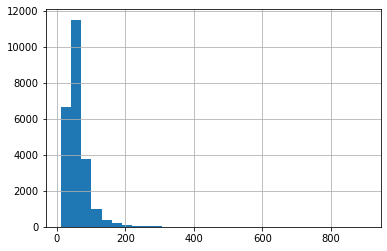

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [15]:
good_table_made(data['total_area'])#Площадь квартиры в 12 кв.м. нереалистична

In [16]:
data.sort_values(by='total_area').head(10)# Исключу значения <15

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,cityCenters_nearest,floor,floors_total,first_day_exposition,...,studio,open_plan,balcony,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,last_price
19904,Санкт-Петербург,1,12.0,10.0,NaN,2.55,964.0,2,5.0,2017-07-19T00:00:00,...,False,False,NaN,21314.0,1.0,886.0,2.0,45.0,4,2400000.0
17961,Санкт-Петербург,1,13.0,NaN,NaN,2.60,15945.0,1,9.0,2017-12-03T00:00:00,...,False,False,NaN,14350.0,0.0,NaN,1.0,185.0,3,1400000.0
19546,Санкт-Петербург,1,13.0,NaN,NaN,3.40,5483.0,2,5.0,2019-03-11T00:00:00,...,False,False,NaN,24915.0,1.0,644.0,0.0,NaN,3,1850000.0
19807,Санкт-Петербург,1,13.0,10.0,NaN,NaN,1242.0,3,5.0,2018-07-04T00:00:00,...,False,False,NaN,21302.0,1.0,592.0,3.0,27.0,0,3800000.0
19558,Санкт-Петербург,1,13.2,NaN,NaN,NaN,4165.0,1,5.0,2018-12-17T00:00:00,...,False,False,NaN,19891.0,1.0,361.0,1.0,155.0,2,1686000.0
19642,Санкт-Петербург,1,14.0,11.0,2.0,NaN,11122.0,1,5.0,2018-07-29T00:00:00,...,False,False,NaN,9898.0,0.0,NaN,0.0,NaN,5,1190000.0
16949,Санкт-Петербург,1,15.0,NaN,NaN,2.70,16376.0,1,9.0,2018-08-21T00:00:00,...,False,False,NaN,51048.0,0.0,NaN,1.0,1079.0,9,1550000.0
12040,Сосновый Бор,1,15.0,NaN,NaN,2.50,NaN,1,5.0,2018-06-27T00:00:00,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,5,1900000.0
8886,Санкт-Петербург,0,15.5,10.0,NaN,NaN,4589.0,2,5.0,2018-08-22T00:00:00,...,True,False,NaN,24326.0,0.0,NaN,1.0,446.0,10,2450000.0
9412,Санкт-Петербург,0,16.0,13.0,NaN,NaN,2111.0,1,6.0,2017-12-10T00:00:00,...,False,True,NaN,20735.0,2.0,228.0,3.0,72.0,5,2100000.0



<div style="border:solid green 2px; padding: 14px">

Здесь вручную добавлю ограничение по общей площади
</div>
       

In [17]:
data_real = data.query('total_area>=15 & total_area<200')

In [18]:
# Средняя площадь
total_area_mean = data_real['total_area'].mean()
total_area_mean

58.16716776063405

<div style="border:solid green 2px; padding: 14px">
    <h3> Цена за кв.м</h3>

</div>

<div style="border:solid green 2px; padding: 14px">
    <h3> Цены </h3>

</div>

In [19]:
print('Минимальная цена = {:.2f}'.format(data['last_price'].min()))
print('Максимальная цена = {:.2f}'.format(data['last_price'].max()))
print('Медиана цен = {:.2f}'.format(data['last_price'].median()))
print('Средняя цена = {:.2f}'.format(data['last_price'].mean()))

Минимальная цена = 12190.00
Максимальная цена = 763000000.00
Медиана цен = 4650000.00
Средняя цена = 6541548.77


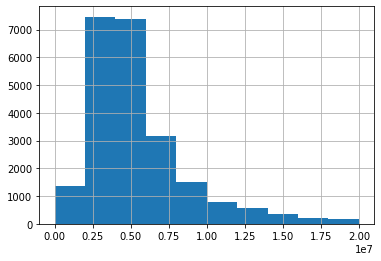

In [20]:
data['last_price'].hist(range=(0,20000000))
plt.show()

In [21]:
data.query('last_price > 50000000 & total_area<200').head()

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,cityCenters_nearest,floor,floors_total,first_day_exposition,...,studio,open_plan,balcony,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,last_price
3,Санкт-Петербург,3,159.0,NaN,NaN,NaN,6800.0,9,14.0,2015-07-24T00:00:00,...,False,False,0.0,28098.0,2.0,84.0,3.0,234.0,0,64900000.0
1436,Санкт-Петербург,3,190.0,95.0,40.0,3.50,1197.0,5,7.0,2018-04-04T00:00:00,...,False,False,NaN,23011.0,3.0,519.0,3.0,285.0,19,330000000.0
1944,Санкт-Петербург,2,125.0,50.0,20.0,3.20,2389.0,2,9.0,2015-12-17T00:00:00,...,False,False,0.0,21912.0,1.0,545.0,1.0,478.0,8,55800000.0
2123,Санкт-Петербург,3,145.9,83.8,20.8,2.85,5249.0,13,20.0,2017-08-23T00:00:00,...,False,False,NaN,26402.0,0.0,NaN,2.0,444.0,20,54000000.0
4394,Санкт-Петербург,3,174.0,95.0,77.0,3.20,4166.0,6,10.0,2015-11-09T00:00:00,...,False,False,NaN,31706.0,1.0,193.0,3.0,199.0,20,57000000.0


<div style="border:solid green 2px; padding: 14px">
    <p> Здесь есть экстремально большие значения. Исключим при подсчете среднего для общей цены и цены за кв.м</p>

</div>

In [22]:
data['price_kv_m'] = data['last_price']/data['total_area']
price_mean = data['last_price'].sum()/data['total_area'].sum()
price_mean

108395.94031315896

In [23]:
price_kv_m_mean = data['price_kv_m'].mean()
print('Средняя цена за кв.м. = {:.2f}'.format(price_kv_m_mean))
print('Минимальная цена за кв.м. = {:.2f}'.format(data['price_kv_m'].min()))
print('Максимальная цена за кв.м. = {:.2f}'.format(data['price_kv_m'].max()))
print('Медиана цен за кв.м. = {:.2f}'.format(data['price_kv_m'].median()))


Средняя цена за кв.м. = 99421.66
Минимальная цена за кв.м. = 111.83
Максимальная цена за кв.м. = 1907500.00
Медиана цен за кв.м. = 95000.00


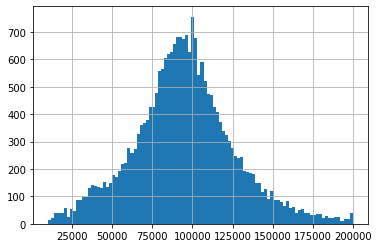

In [24]:
data['price_kv_m'].hist(bins=100, range=(10000,200000))

In [25]:
# Поменяем тип полей на целочисленный
data['last_price'] = data['last_price'].astype(int)
data['price_kv_m'] = data['price_kv_m'].astype(int)

<div style="border:solid green 2px; padding: 14px">
    <h3> Жилая площадь</h3>

</div>

In [26]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [27]:
data[data['living_area']<10]['living_area'].count() #Это нереалистичные значения жилой площади встречается 25 раз

25

<div style="border:solid green 2px; padding: 14px">
Исследуем жилую площадь в квартирах. Найдем корреляцию и посмотрим графики.
</div>

In [28]:
data_living_full = data[-data['living_area'].isna()]
data['total_area'].corr(data['living_area']) # сильное влияние

0.9395373338721499

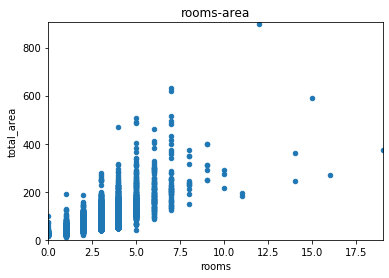

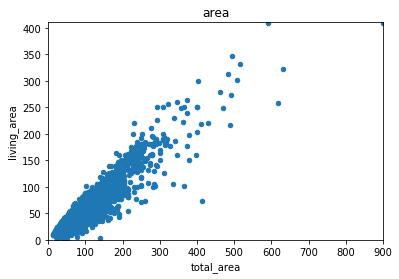

In [29]:
data_living_full.plot(x='rooms', y='total_area', kind='scatter',xlim=(0,19), ylim=(0,905), title='rooms-area')
data_living_full.plot(x='total_area', y='living_area', kind='scatter',xlim=(0,900), ylim=(0,410), title='area')

In [30]:
living_area_mean = data['living_area'].mean()
print('Средняя жилая площадь = {:.2f}'.format(living_area_mean))

Средняя жилая площадь = 34.46


<div style="border:solid green 2px; padding: 14px">
    <h3> Жилая площадь. Продолжение</h3>
<p>Заполним пропуски.
Создадим словарь для хранения среднего значения отношения общей площади от жилой, предварительно сгруппировав квартиры по количеству комнат. Затеммучительно долго заменяем нулевые значения в столбце 'living_area' на среднее отношение, в зависимости от количества комнат.

</p>
</div>

In [31]:
df_list_romms = data.groupby('rooms', as_index=False).sum()

In [32]:
df_list_romms['dolja_total_living'] = df_list_romms['living_area']/df_list_romms['total_area']

In [33]:
data = data.join(df_list_romms[['rooms', 'dolja_total_living']].set_index('rooms'), on='rooms')

In [34]:
data['living_area'].fillna(data['total_area']*data['dolja_total_living'], inplace=True)

In [35]:
dolja_total_living_mean = ((data['living_area'].sum())/(data['total_area'].sum())).mean()

In [36]:
print('Средняя величина отношения жилой площади к общей площади = {:.2f}'.format(dolja_total_living_mean))
print('Жилая площадь составляет {:.2%} от общей площади квартиры'.format(dolja_total_living_mean))

Средняя величина отношения жилой площади к общей площади = 0.57
Жилая площадь составляет 56.93% от общей площади квартиры


<div style="border:solid green 2px; padding: 14px">
    <h3>Площадь кухни</h3>
<p>Заполним пропуски в столбце 'kitchen_area'.
В квартирах с планировкой, не предусматривающей кухню - площадь приравняем к 0. Для остальных найдем среднюю долю кухни от общей площади и найдем примерную площадь кухни.
</p>
</div>

In [37]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [38]:
kitchen_area_bad = data[data['kitchen_area']<5]['kitchen_area']#Площадь кухни <5 кв.м. нереалистична

In [39]:
data.head()

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,cityCenters_nearest,floor,floors_total,first_day_exposition,...,balcony,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,last_price,price_kv_m,dolja_total_living
0,Санкт-Петербург,3,108.0,51.000000,25.0,2.70,16028.0,8,16.0,2019-03-07T00:00:00,...,NaN,18863.0,1.0,482.0,2.0,755.0,20,13000000,120370,0.562421
1,Посёлок Шушары,1,40.4,18.600000,11.0,NaN,18603.0,1,11.0,2018-12-04T00:00:00,...,2.0,12817.0,0.0,NaN,0.0,NaN,7,3350000,82920,0.436401
2,Санкт-Петербург,2,56.0,34.300000,8.3,NaN,13933.0,4,5.0,2015-08-20T00:00:00,...,0.0,21741.0,1.0,90.0,2.0,574.0,10,5196000,92785,0.522114
3,Санкт-Петербург,3,159.0,89.424963,NaN,NaN,6800.0,9,14.0,2015-07-24T00:00:00,...,0.0,28098.0,2.0,84.0,3.0,234.0,0,64900000,408176,0.562421
4,Санкт-Петербург,2,100.0,32.000000,41.0,3.03,8098.0,13,14.0,2018-06-19T00:00:00,...,NaN,31856.0,2.0,112.0,1.0,48.0,2,10000000,100000,0.522114


In [40]:
data_kitchen_nan = data[(data['kitchen_area'].isna()) & (data['studio'] | data['open_plan'])]
#В этих квартирах нет кухни, можно приравнять площадь к 0

In [41]:
for i in data_kitchen_nan.index:
    data.loc[i,'kitchen_area'] = 0

In [42]:
data_for_mean = data.drop(kitchen_area_bad.index)
data_for_mean = data_for_mean.drop(data_kitchen_nan.index)

In [43]:
data_no_kitchen=data[data['kitchen_area'].isna()]

data['dolja_kitchen']=data['kitchen_area']/data['total_area']

kitchen_area_sum=data_for_mean['kitchen_area'].sum()
total_area_sum=data_for_mean['total_area'].sum()

kitchen_dolja_mean = (kitchen_area_sum/total_area_sum)

kitchen_dolja_mean

0.15918142005326005

In [44]:
data['kitchen_area'].fillna(data['total_area']*kitchen_dolja_mean, inplace=True)
kitchen_area_mean = data['kitchen_area'].mean()
print('Средняя площадь кухни = {:.2f}'.format(kitchen_area_mean))

Средняя площадь кухни = 10.38


In [45]:
data['dolja_kitchen'].fillna(kitchen_dolja_mean, inplace=True)

In [46]:
print('Средняя величина отношения площади кухни к общей площади = {:.2f}'.format(kitchen_dolja_mean))
print('Площадь кухни составляет {:.2%} от общей площади квартиры'.format(kitchen_dolja_mean))

Средняя величина отношения площади кухни к общей площади = 0.16
Площадь кухни составляет 15.92% от общей площади квартиры


<div style="border:solid green 2px; padding: 14px">
<h3>Высота потолка</h3>
    <p>Отбросим выбросы и нереалистичные значения, найдем среднее, заполним пропуски.</p>


</div>

In [47]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [48]:
data_high = data[data['ceiling_height']>9]
data_high.head() #Считаю нереалистичной высоту потолков более 9м
# Пропущенные значения можно заменить на mean или оставить

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,cityCenters_nearest,floor,floors_total,first_day_exposition,...,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,last_price,price_kv_m,dolja_total_living,dolja_kitchen
355,Гатчина,2,55.2,32.0,8.786814,25.0,NaN,2,5.0,2018-07-12T00:00:00,...,NaN,NaN,NaN,NaN,NaN,17,3600000,65217,0.522114,0.159181
3148,Волхов,3,75.0,53.0,8.000000,32.0,NaN,2,3.0,2018-11-12T00:00:00,...,NaN,NaN,NaN,NaN,NaN,14,2900000,38666,0.562421,0.106667
4643,Санкт-Петербург,2,45.0,30.0,7.000000,25.0,13256.0,2,9.0,2018-02-01T00:00:00,...,12016.0,1.0,658.0,1.0,331.0,0,4300000,95555,0.522114,0.155556
4876,Посёлок Мурино,0,25.0,17.0,0.000000,27.0,NaN,17,25.0,2017-09-27T00:00:00,...,NaN,NaN,NaN,NaN,NaN,7,3000000,120000,0.598522,0.000000
5076,Санкт-Петербург,1,30.5,19.5,5.500000,24.0,8389.0,1,5.0,2018-10-03T00:00:00,...,29686.0,3.0,397.0,1.0,578.0,0,3850000,126229,0.436401,0.180328


In [49]:
data.query('ceiling_height > 9 and living_area < 10')#Предположила, что значения этих столбцов могли быть переставлены

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,cityCenters_nearest,floor,floors_total,first_day_exposition,...,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,last_price,price_kv_m,dolja_total_living,dolja_kitchen


In [50]:
print('Средняя высота потолка = {:.2f}'.format(data['ceiling_height'].mean()))
print('Медиана высот потолка = {:.2f}'.format(data['ceiling_height'].median()))

print('Средняя высота потолка среди правдоподобных величин - {:.2f}'
      .format(data.query('ceiling_height > 2.4 and ceiling_height < 9')['ceiling_height'].mean()))
print('Медиана высот потолка среди правдоподобных величин - {:.2f}'
      .format(data.query('ceiling_height > 2.4 and ceiling_height < 9')['ceiling_height'].median()))


Средняя высота потолка = 2.77
Медиана высот потолка = 2.65
Средняя высота потолка среди правдоподобных величин - 2.73
Медиана высот потолка среди правдоподобных величин - 2.65


<div style="border:solid green 2px; padding: 14px">

   <p> Нахожу среднее по выборке реальных значений
    </p>


</div>

In [51]:
# Для замены выбрала среднее по выборке хороших значений
mean_height = data.query('ceiling_height > 2.4 and ceiling_height < 9')['ceiling_height'].mean()

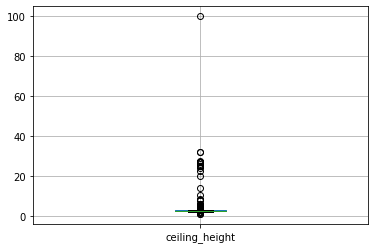

In [52]:
data[-data['ceiling_height'].isna()].boxplot(column='ceiling_height')
plt.show()

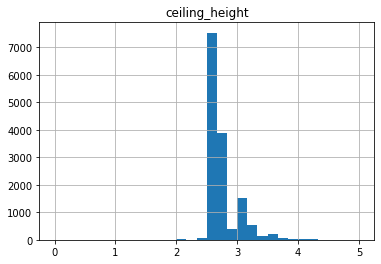

In [53]:
data[-data['ceiling_height'].isna()].hist(column='ceiling_height', bins=30, range=(0,5))
plt.show()

In [54]:
data['ceiling_height'].fillna(mean_height, inplace=True)

<div style="border:solid green 2px; padding: 14px">
<h3> Этаж </h3>
    <p> Мало пропущенных данных. Найдем распространенную этажность. Можно заполнить средним значением, исключив редкие данные. Думаю, надо заполнять распространенными вариантами этажности - 5, 9, 16, 12.
    </p>


</div>

In [55]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

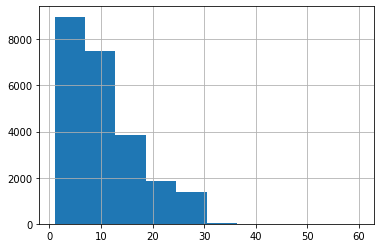

In [56]:
data_floors_nan = data[data['floors_total'].isna()]
data['floors_total'].value_counts()
data['floors_total'].hist()
plt.show()

In [57]:
data_floors_nan = data[data['floors_total'].isna()]

data[data['floors_total']<30]['floors_total'].median() # = 9
data['floors_total'].median() # = 9

9.0

In [58]:
def floors_total_choose(row):
    if row <= 5:
        return 5
    elif row > 5 and row <= 9:
        return 9
    elif row > 9 and row <= 12:
        return 12
    elif row >12 and row <=16:
        return 16
    else:
        return row

In [59]:
data_floors_nan['floors_total'] = data_floors_nan['floor'].apply(floors_total_choose)

/Users/Alexander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
for i in data_floors_nan.index:
    data.loc[i,'floors_total'] = data_floors_nan.loc[i,'floors_total']
    

In [61]:
# Поменяем тип данных на целочисленный
data['floors_total'] = data['floors_total'].astype(int)
data['floor'] = data['floor'].astype(int)

<div style="border:solid green 2px; padding: 14px">
<h3> Этаж. Группировка (первый, последний, другой) </h3>
    <p> </p>


</div>


<div style="border:solid green 2px; padding: 14px">

   <p> 
1 - первый этаж
2 - другой
3 - последний
    </p>


</div>

In [62]:
data['floor_group'] = np.where(data['floor']==1, 1, 
                               (np.where(data['floor']==data['floors_total'], 3, 2)))

In [63]:
data['floor_group'].value_counts()

2    17414
3     3368
1     2917
Name: floor_group, dtype: int64

<div style="border:solid green 2px; padding: 14px">
<h3> День подачи объявления и продажи </h3>
    <p> Изменим тип столбца 'first_day_exposition', заполним пропуски 'days_exposition', добавим столбцы: день недели, месяц и год публикации объявления.
    </p>


</div>

In [64]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

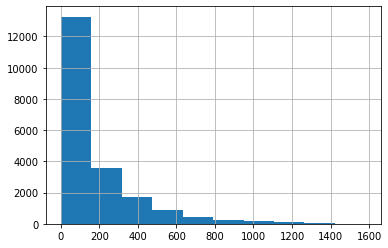

In [65]:
data['days_exposition'].hist()
plt.show()

In [66]:
data_exposition_nan = data[data['days_exposition'].isna()] #Вероятно часть пропусков - это не проданные квартиры. 
#Можно заменить на количество дней с даты подачи объявления до сегодня.

In [67]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [68]:
today = pd.datetime.today()
today = pd.to_datetime(today)

today


Timestamp('2019-12-05 10:24:06.760963')

In [69]:
data_exp_nan = data[data['days_exposition'].isna()]

In [70]:
data_exp_nan['days_exposition']=(today-data_exp_nan['first_day_exposition'])/np.timedelta64(1,'D')
data_exp_nan['days_exposition'].describe()


/Users/Alexander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    3181.000000
mean      434.074405
std       305.330827
min       216.433412
25%       247.433412
50%       297.433412
75%       492.433412
max      1834.433412
Name: days_exposition, dtype: float64

In [71]:
data['days_exposition'] = data['days_exposition'].fillna(data_exp_nan['days_exposition'])

In [72]:
#Меняем тип столбца на int, количество дней - целое число
data['days_exposition'] = data['days_exposition'].astype(int)

In [73]:
data['days_exposition'].describe()

count    23699.000000
mean       214.814338
std        248.462918
min          1.000000
25%         45.000000
50%        124.000000
75%        283.000000
max       1834.000000
Name: days_exposition, dtype: float64

In [74]:
data['day_of_week_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

<div style="border:solid green 2px; padding: 14px">
<h3> Аппартаменты </h3>
    <p> Заполним пропущенные значения на False. Думаю, не указано, значит не аппартаменты.
    </p>


</div>

In [75]:
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'] = data['is_apartment'].astype(bool)

<div style="border:solid green 2px; padding: 14px">
<h3> Расстояние до аэропорта </h3>
    <p> Найдем значение медианы расстояния до эропорта для квартир в черте города и отдельно для пригородов.
        Заполним пропущенные значения медианой. Часть пропущенных значений может быть связана с отсутсвием аэропорта в населенном пункте.
    </p>


</div>

In [76]:
data['airports_nearest'].describe()


count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

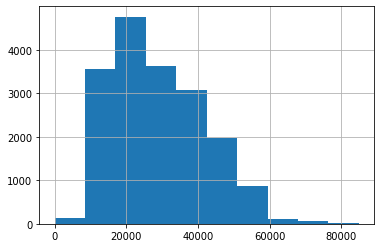

In [77]:
data['airports_nearest'].hist() 
plt.show()

In [78]:
data[data['airports_nearest']<5000]#Квартира в аэропорту?

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,cityCenters_nearest,floor,floors_total,first_day_exposition,...,ponds_nearest,total_images,last_price,price_kv_m,dolja_total_living,dolja_kitchen,floor_group,day_of_week_exposition,month_exposition,year_exposition
21085,Санкт-Петербург,1,34.7,19.8,6.0,2.7,22801.0,3,9,2018-09-23,...,NaN,0,7000000,201729,0.436401,0.172911,2,6,9,2018


In [79]:
data_airports_real = data.query('airports_nearest>5000 & airports_nearest<55000')

In [80]:
data_airports_real['airports_nearest'].describe()

count    17832.000000
mean     28185.397151
std      11867.311082
min       6450.000000
25%      18484.500000
50%      26346.500000
75%      36724.000000
max      54990.000000
Name: airports_nearest, dtype: float64

In [81]:
df_list_city = data.groupby('locality_name', as_index=False)['airports_nearest'].agg(['sum', 'count'])
df_list_city.head()


,sum,count
locality_name,,
Unknow_Area,296160.0,12
Бокситогорск,0.0,0
Волосово,0.0,0
Волхов,0.0,0
Всеволожск,0.0,0



<div style="border:solid green 2px; padding: 14px">

   <p> 
    Слишком много нулевых значений, оставлю среднее по пригородам
    </p>
</div>

In [82]:
data_airports_real

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,cityCenters_nearest,floor,floors_total,first_day_exposition,...,ponds_nearest,total_images,last_price,price_kv_m,dolja_total_living,dolja_kitchen,floor_group,day_of_week_exposition,month_exposition,year_exposition
0,Санкт-Петербург,3,108.00,51.000000,25.000000,2.700000,16028.0,8,16,2019-03-07,...,755.0,20,13000000,120370,0.562421,0.231481,2,3,3,2019
1,Посёлок Шушары,1,40.40,18.600000,11.000000,2.729566,18603.0,1,11,2018-12-04,...,NaN,7,3350000,82920,0.436401,0.272277,1,1,12,2018
2,Санкт-Петербург,2,56.00,34.300000,8.300000,2.729566,13933.0,4,5,2015-08-20,...,574.0,10,5196000,92785,0.522114,0.148214,2,3,8,2015
3,Санкт-Петербург,3,159.00,89.424963,25.309846,2.729566,6800.0,9,14,2015-07-24,...,234.0,0,64900000,408176,0.562421,0.159181,2,4,7,2015
4,Санкт-Петербург,2,100.00,32.000000,41.000000,3.030000,8098.0,13,14,2018-06-19,...,48.0,2,10000000,100000,0.522114,0.410000,2,1,6,2018
6,Посёлок Парголово,1,37.30,10.600000,14.400000,2.729566,19143.0,6,26,2017-11-02,...,NaN,6,3700000,99195,0.436401,0.386059,2,3,11,2017
7,Санкт-Петербург,2,71.60,37.383366,18.900000,2.729566,11634.0,22,24,2019-04-18,...,NaN,5,7915000,110544,0.522114,0.263966,2,3,4,2019
9,Санкт-Петербург,3,61.00,43.600000,6.500000,2.500000,15008.0,7,9,2017-02-26,...,NaN,18,5400000,88524,0.562421,0.106557,2,6,2,2017
10,Санкт-Петербург,1,39.60,20.300000,8.500000,2.670000,13878.0,3,12,2017-11-16,...,553.0,5,5050000,127525,0.436401,0.214646,2,3,11,2017
11,Ломоносов,2,44.00,31.000000,6.000000,2.729566,51677.0,4,5,2018-08-27,...,NaN,9,3300000,75000,0.522114,0.136364,2,0,8,2018


In [83]:
#Нашли медиану значений расстояния до аэропорта квартир СПб и присвоили его остальным квартирам СПб
data_airpot_spb_median = data_airports_real[data_airports_real['locality_name'] == "Санкт-Петербург"]['airports_nearest'].median()
#В окрестностях нет аэропорта, поэтому сложно предсказать расстояние до него. только по карте. 
#Сделаю среднее или медиану по окресностям.
data_airpot_area_median = data_airports_real.query('locality_name != "Санкт-Петербург"')['airports_nearest'].median()
print('Медиана значений расстояния до аэропорта квартир СПб = {:.2f}'.format(data_airpot_spb_median))
print('Медиана значений расстояния до аэропорта квартир в пригородах СПб = {:.2f}'.format(data_airpot_area_median))

Медиана значений расстояния до аэропорта квартир СПб = 26737.00
Медиана значений расстояния до аэропорта квартир в пригородах СПб = 25532.00


In [84]:
data['airports_nearest'] = np.where(-data['airports_nearest'].isna(), data['airports_nearest'],np.where((data['locality_name']=='Санкт-Петербург'), data_airpot_spb_median, data_airpot_area_median))
         

In [85]:
data['airports_nearest'].describe() 

count    23699.000000
mean     28035.253597
std      11140.876176
min          0.000000
25%      21183.000000
50%      25532.000000
75%      34327.000000
max      84869.000000
Name: airports_nearest, dtype: float64

 <div style="border:solid green 2px; padding: 14px">
<h3> Расстояние до центра, парка, пруда </h3>
    <p> 
    </p>
</div>

 <div style="border:solid green 2px; padding: 14px">
<h5> Расстояние до центра </h5>
    <p> 
    </p>
</div>

cityCenters_nearest



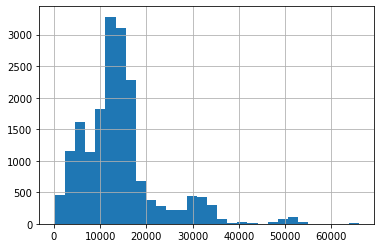

In [86]:
good_table_made(data['cityCenters_nearest'])
plt.show()

In [87]:
#Нашли медиану значений расстояния до ценра квартир СПб и присвоили его остальным квартирам СПб
data_center_spb_median = data_airports_real.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].median()
#Сделаю среднее или медиану по окресностям.
data_center_area_median = data_airports_real.query('locality_name != "Санкт-Петербург"')['cityCenters_nearest'].median()
print('Медиана значений расстояния до цетра квартир СПб = {:.2f}'.format(data_center_spb_median))
print('Медиана значений расстояния до центра квартир в пригородах СПб = {:.2f}'.format(data_center_area_median))

Медиана значений расстояния до цетра квартир СПб = 12242.00
Медиана значений расстояния до центра квартир в пригородах СПб = 29902.00


In [88]:
data['cityCenters_nearest'] = np.where(-data['cityCenters_nearest'].isna(), data['cityCenters_nearest'], np.where((data['locality_name']=='Санкт-Петербург'), data_center_spb_median, data_center_area_median))
    

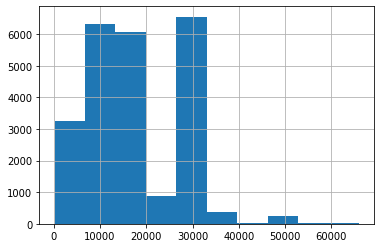

In [89]:
data['cityCenters_nearest'].hist()
plt.show()

 <div style="border:solid green 2px; padding: 14px">
<h5> Парки вокруг </h5>
    <p> Заменим пропуски нулями.
    </p>
</div>

In [90]:
data_has_park = data[-data['parks_around3000'].isna()]
data_has_park_spb = data_has_park[data_has_park['locality_name']=='Санкт-Петербург']['parks_around3000']
data_has_park_area = data_has_park[data_has_park['locality_name']!='Санкт-Петербург']['parks_around3000']
print('Медиана по столбцу для СПб = {:.2f}'.format(data_has_park_spb.median()))
print('Медиана по столбцу для пригородов = {:.2f}'.format(data_has_park_area.median()))
print('Среднее по столбцу для СПб = {:.2f}'.format(data_has_park_spb.mean()))
print('Среднее по столбцу для пригородов = {:.2f}'.format(data_has_park_area.mean()))


Медиана по столбцу для СПб = 0.00
Медиана по столбцу для пригородов = 0.00
Среднее по столбцу для СПб = 0.63
Среднее по столбцу для пригородов = 0.51


In [91]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [92]:
data[data['parks_around3000'].isna()].isna().sum() 
#Для этих квартир нет дпнных о cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest
#думаю, что продавец не указал

locality_name                0
rooms                        0
total_area                   0
living_area                  0
kitchen_area                 0
ceiling_height               0
cityCenters_nearest          0
floor                        0
floors_total                 0
first_day_exposition         0
days_exposition              0
is_apartment                 0
studio                       0
open_plan                    0
balcony                   2710
airports_nearest             0
parks_around3000          5518
parks_nearest             5518
ponds_around3000          5518
ponds_nearest             5518
total_images                 0
last_price                   0
price_kv_m                   0
dolja_total_living           0
dolja_kitchen                0
floor_group                  0
day_of_week_exposition       0
month_exposition             0
year_exposition              0
dtype: int64

In [93]:
data['parks_around3000'].fillna(0, inplace=True)
data['parks_around3000'] = data['parks_around3000'].astype(int)

 <div style="border:solid green 2px; padding: 14px">
<h5> Расстояние до парка</h5>
    Посмотрим на значения. Проверим есть ли пропуски в столбце при наличии парка рядом (parks_around3000), если есть - заполним пропуск средним. Остальные пропуски можно заменить на значение больше 3000.
</div>

parks_nearest



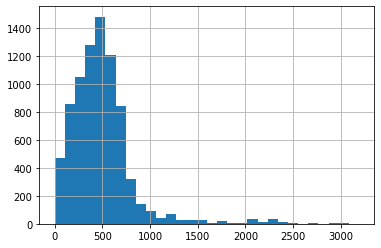

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [94]:
good_table_made(data['parks_nearest'])

In [95]:
data[(data['parks_around3000']>0) & (data['parks_nearest'].isna())]

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,cityCenters_nearest,floor,floors_total,first_day_exposition,...,ponds_nearest,total_images,last_price,price_kv_m,dolja_total_living,dolja_kitchen,floor_group,day_of_week_exposition,month_exposition,year_exposition


 <div style="border:solid green 2px; padding: 14px">
<h5> Пруды вокруг </h5>
    <p> Заменим пропуски нулями.
    </p>
</div>

In [96]:
data_has_park = data[-data['ponds_around3000'].isna()]
data_has_park_spb = data_has_park[data_has_park['locality_name']=='Санкт-Петербург']['ponds_around3000']
data_has_park_area = data_has_park[data_has_park['locality_name']!='Санкт-Петербург']['ponds_around3000']
print('Медиана по столбцу для СПб = {:.2f}'.format(data_has_park_spb.median()))
print('Медиана по столбцу для пригородов = {:.2f}'.format(data_has_park_area.median()))
print('Среднее по столбцу для СПб = {:.2f}'.format(data_has_park_spb.mean()))
print('Среднее по столбцу для пригородов = {:.2f}'.format(data_has_park_area.mean()))

Медиана по столбцу для СПб = 1.00
Медиана по столбцу для пригородов = 0.00
Среднее по столбцу для СПб = 0.77
Среднее по столбцу для пригородов = 0.77


In [97]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [98]:
data['ponds_around3000'].fillna(0, inplace=True)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

 <div style="border:solid green 2px; padding: 14px">
<h5> Расстояние до пруда</h5>
    Посмотрим на значения. Проверим есть ли пропуски в столбце при наличии парка рядом (ponds_around3000), если есть - заполним пропуск средним. Остальные пропуски можно заменить на значение больше 3000.
</div>

ponds_nearest



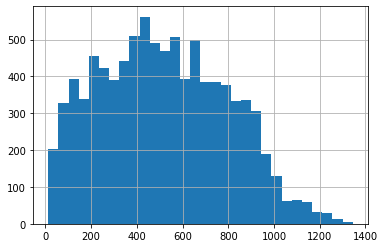

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [99]:
good_table_made(data['ponds_nearest'])

In [100]:
#Нужно изменить тип полей. Приводим к int поля с целочисленными данными

data['total_images'] = data['total_images'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [101]:
data.head()

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,cityCenters_nearest,floor,floors_total,first_day_exposition,...,ponds_nearest,total_images,last_price,price_kv_m,dolja_total_living,dolja_kitchen,floor_group,day_of_week_exposition,month_exposition,year_exposition
0,Санкт-Петербург,3,108.0,51.000000,25.000000,2.700000,16028.0,8,16,2019-03-07,...,755.0,20,13000000,120370,0.562421,0.231481,2,3,3,2019
1,Посёлок Шушары,1,40.4,18.600000,11.000000,2.729566,18603.0,1,11,2018-12-04,...,NaN,7,3350000,82920,0.436401,0.272277,1,1,12,2018
2,Санкт-Петербург,2,56.0,34.300000,8.300000,2.729566,13933.0,4,5,2015-08-20,...,574.0,10,5196000,92785,0.522114,0.148214,2,3,8,2015
3,Санкт-Петербург,3,159.0,89.424963,25.309846,2.729566,6800.0,9,14,2015-07-24,...,234.0,0,64900000,408176,0.562421,0.159181,2,4,7,2015
4,Санкт-Петербург,2,100.0,32.000000,41.000000,3.030000,8098.0,13,14,2018-06-19,...,48.0,2,10000000,100000,0.522114,0.410000,2,1,6,2018


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
locality_name             23699 non-null object
rooms                     23699 non-null int64
total_area                23699 non-null float64
living_area               23699 non-null float64
kitchen_area              23699 non-null float64
ceiling_height            23699 non-null float64
cityCenters_nearest       23699 non-null float64
floor                     23699 non-null int64
floors_total              23699 non-null int64
first_day_exposition      23699 non-null datetime64[ns]
days_exposition           23699 non-null int64
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
balcony                   12180 non-null float64
airports_nearest          23699 non-null float64
parks_around3000          23699 non-null int64
parks_nearest             8079 non-null float64
ponds_around3000       

 <div style="border:solid green 2px; padding: 14px">
<h1> Исследование </h1>
    <p> 
    </p>
</div>

 <div style="border:solid green 2px; padding: 14px">
<h3> Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи? </h3>
    <p> 
    </p>
</div>

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
locality_name             23699 non-null object
rooms                     23699 non-null int64
total_area                23699 non-null float64
living_area               23699 non-null float64
kitchen_area              23699 non-null float64
ceiling_height            23699 non-null float64
cityCenters_nearest       23699 non-null float64
floor                     23699 non-null int64
floors_total              23699 non-null int64
first_day_exposition      23699 non-null datetime64[ns]
days_exposition           23699 non-null int64
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
balcony                   12180 non-null float64
airports_nearest          23699 non-null float64
parks_around3000          23699 non-null int64
parks_nearest             8079 non-null float64
ponds_around3000       

In [104]:
data.columns

Index(['locality_name', 'rooms', 'total_area', 'living_area', 'kitchen_area',
       'ceiling_height', 'cityCenters_nearest', 'floor', 'floors_total',
       'first_day_exposition', 'days_exposition', 'is_apartment', 'studio',
       'open_plan', 'balcony', 'airports_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'total_images',
       'last_price', 'price_kv_m', 'dolja_total_living', 'dolja_kitchen',
       'floor_group', 'day_of_week_exposition', 'month_exposition',
       'year_exposition'],
      dtype='object')

In [105]:
data_sale = data.drop(['days_exposition', 'days_exposition', 'is_apartment', 'studio', 'open_plan', 'airports_nearest', 'parks_around3000', 'floors_total', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'total_images', 'first_day_exposition','dolja_total_living', 'dolja_kitchen', 'month_exposition', 'ceiling_height', 'floor','year_exposition', 'day_of_week_exposition', 'balcony'], axis=1)

In [106]:
data_sale.head()

,locality_name,rooms,total_area,living_area,kitchen_area,cityCenters_nearest,last_price,price_kv_m,floor_group
0,Санкт-Петербург,3,108.0,51.000000,25.000000,16028.0,13000000,120370,2
1,Посёлок Шушары,1,40.4,18.600000,11.000000,18603.0,3350000,82920,1
2,Санкт-Петербург,2,56.0,34.300000,8.300000,13933.0,5196000,92785,2
3,Санкт-Петербург,3,159.0,89.424963,25.309846,6800.0,64900000,408176,2
4,Санкт-Петербург,2,100.0,32.000000,41.000000,8098.0,10000000,100000,2


In [107]:
print('Общие данные по всем квартирам')
print('Среднее количество комнат = {:.2f}'.format(data['rooms'].median()))
print('Средняя общая площадь = {:.2f}'.format(total_area_mean))
print('Средняя жилая площадь = {:.2f}'.format(living_area_mean))
print('Средняя цена за кв.м. = {:.2f}'.format(price_kv_m_mean))
print('Средняя цена = {:.2f}'.format(data['last_price'].mean()))

Общие данные по всем квартирам
Среднее количество комнат = 2.00
Средняя общая площадь = 58.17
Средняя жилая площадь = 34.46
Средняя цена за кв.м. = 99421.66
Средняя цена = 6541548.77


                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.269377 -0.204368   -0.270829
last_price                     -0.269377    1.000000  0.363343    0.653675
rooms                          -0.204368    0.363343  1.000000    0.758344
total_area                     -0.270829    0.653675  0.758344    1.000000


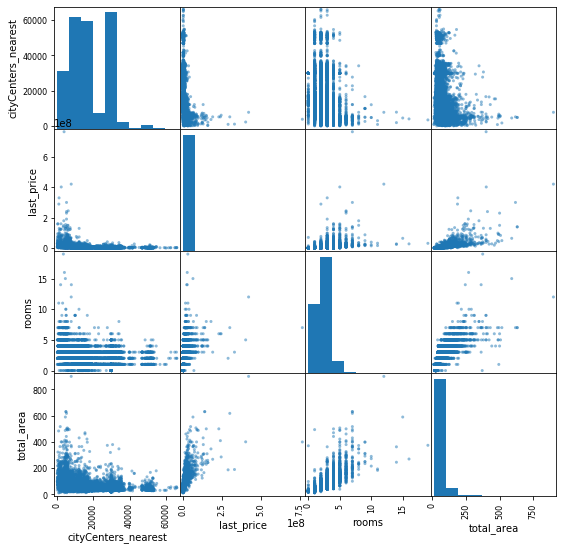

In [108]:
station_stat_multi = data.pivot_table(index=data.index, values=['total_area', 
                'rooms', 'last_price', 'cityCenters_nearest'], aggfunc='mean')
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, grid=30, figsize=(9,9))
plt.show()


<div style="border:solid green 2px; padding: 14px">

  <p> 
   Общая площадь влияет на цену (0,65), количество комнат мало влияет(0,36). 
</p>
</div>



                  last_price  parks_around3000  ponds_around3000
last_price          1.000000          0.197840          0.208621
parks_around3000    0.197840          1.000000          0.392668
ponds_around3000    0.208621          0.392668          1.000000


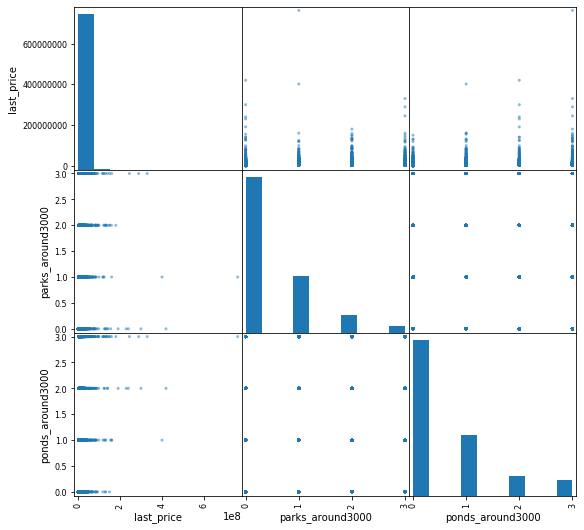

In [109]:
station_stat_multi2 = data.pivot_table(index=data.index, values=['parks_around3000', 
                                    'ponds_around3000', 'last_price'], aggfunc='mean')
print(station_stat_multi2.corr())
pd.plotting.scatter_matrix(station_stat_multi2, grid=30, figsize=(9,9))
plt.show()


<div style="border:solid green 2px; padding: 14px">

  <p> 
   Близость к центру, паркам и прудам мало влияет на цену.
    </p>
</div>


In [156]:
print('Средний срок продажи квартиры - {:.1f} день'.format(data['days_exposition'].median()))


Средний срок продажи квартиры - 124.0 день


 <div style="border:solid green 2px; padding: 14px">
<h3> 
Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.
Какие факторы больше всего влияют на стоимость квартиры? </h3>
    <p> 
    </p>
</div>

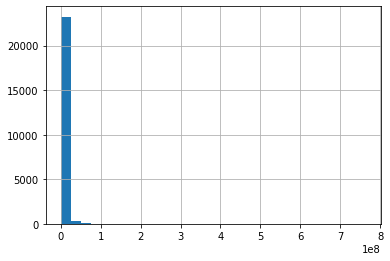

In [111]:
data['last_price'].hist(bins=30)
plt.show()

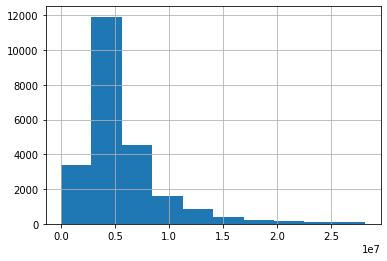

In [112]:
data.sort_values(by=['last_price']).head(20) # обнаружено минимальное значение - 12190, установим нижнюю границу среза - 430000
data.sort_values(by=['last_price']).tail(40) # установим верхнюю границу среза - 230000000
df_last_price = data.query('last_price <= 28315575') 
# медиана + 2 std = 28315575, из данных графика я бы отсекла все больше 13000000, чтобы график был близок к нормальному. 
# Корреляция выше и правдоподобнее с верхней границей 28315575
df_last_price['last_price'].hist(grid=30)
plt.show()


<div style="border:solid green 2px; padding: 14px">

  <p> 
    Те же действия с помощью моих ненаглядных функций
    </p>
</div>


last_price



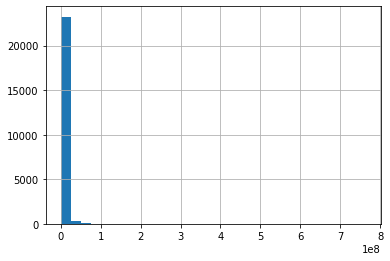

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [113]:
good_table_made(data['last_price'])

In [114]:
last_price_mean = df_last_price['last_price'].mean()
print('Среднее значение среди цен = {:.2f}'.format(last_price_mean))
print('Медиана значений цен = {:.2f}'.format(data['last_price'].median()))

Среднее значение среди цен = 5694393.82
Медиана значений цен = 4650000.00


 <div style="border:solid green 2px; padding: 14px">
    <p> 
        Построим графики зависимости на основе таблицы без выбросов
    </p>
</div>

In [115]:
df_last_price.head()# = data.query('last_price >= 430000 & last_price <= 28315575')

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,cityCenters_nearest,floor,floors_total,first_day_exposition,...,ponds_nearest,total_images,last_price,price_kv_m,dolja_total_living,dolja_kitchen,floor_group,day_of_week_exposition,month_exposition,year_exposition
0,Санкт-Петербург,3,108.0,51.0,25.0,2.700000,16028.0,8,16,2019-03-07,...,755.0,20,13000000,120370,0.562421,0.231481,2,3,3,2019
1,Посёлок Шушары,1,40.4,18.6,11.0,2.729566,18603.0,1,11,2018-12-04,...,NaN,7,3350000,82920,0.436401,0.272277,1,1,12,2018
2,Санкт-Петербург,2,56.0,34.3,8.3,2.729566,13933.0,4,5,2015-08-20,...,574.0,10,5196000,92785,0.522114,0.148214,2,3,8,2015
4,Санкт-Петербург,2,100.0,32.0,41.0,3.030000,8098.0,13,14,2018-06-19,...,48.0,2,10000000,100000,0.522114,0.410000,2,1,6,2018
5,Городской Посёлок Янино-1,1,30.4,14.4,9.1,2.729566,29902.0,5,12,2018-09-10,...,NaN,10,2890000,95065,0.436401,0.299342,2,0,9,2018


                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.487272 -0.178599   -0.257024
last_price                     -0.487272    1.000000  0.518231    0.785057
rooms                          -0.178599    0.518231  1.000000    0.793502
total_area                     -0.257024    0.785057  0.793502    1.000000


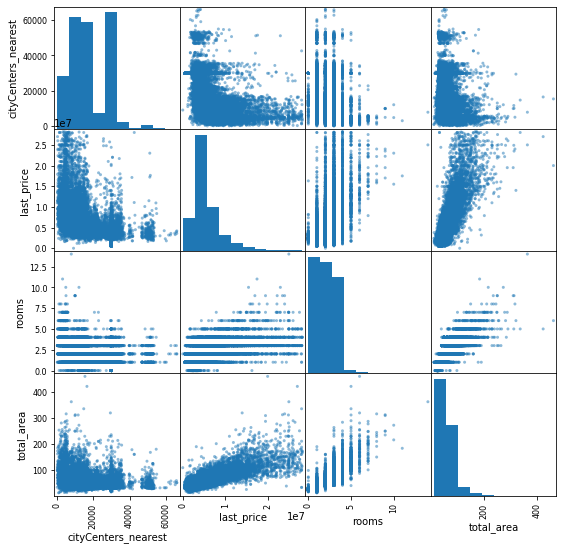

In [116]:
stat_multi_good = df_last_price.pivot_table(index=df_last_price.index, values=['total_area', 'rooms', 
                                                'last_price', 'cityCenters_nearest'], aggfunc='mean')
print(stat_multi_good.corr())
pd.plotting.scatter_matrix(stat_multi_good, grid=30, figsize=(9,9))
plt.show()


<div style="border:solid green 2px; padding: 14px">

  <p> 
    Влияние общей площади и количества комнат на цену значительно усилилось.
</p>
</div>

                  floor_group  last_price  parks_around3000  ponds_around3000
floor_group          1.000000    0.058549          0.010402          0.015213
last_price           0.058549    1.000000          0.285302          0.297152
parks_around3000     0.010402    0.285302          1.000000          0.385616
ponds_around3000     0.015213    0.297152          0.385616          1.000000


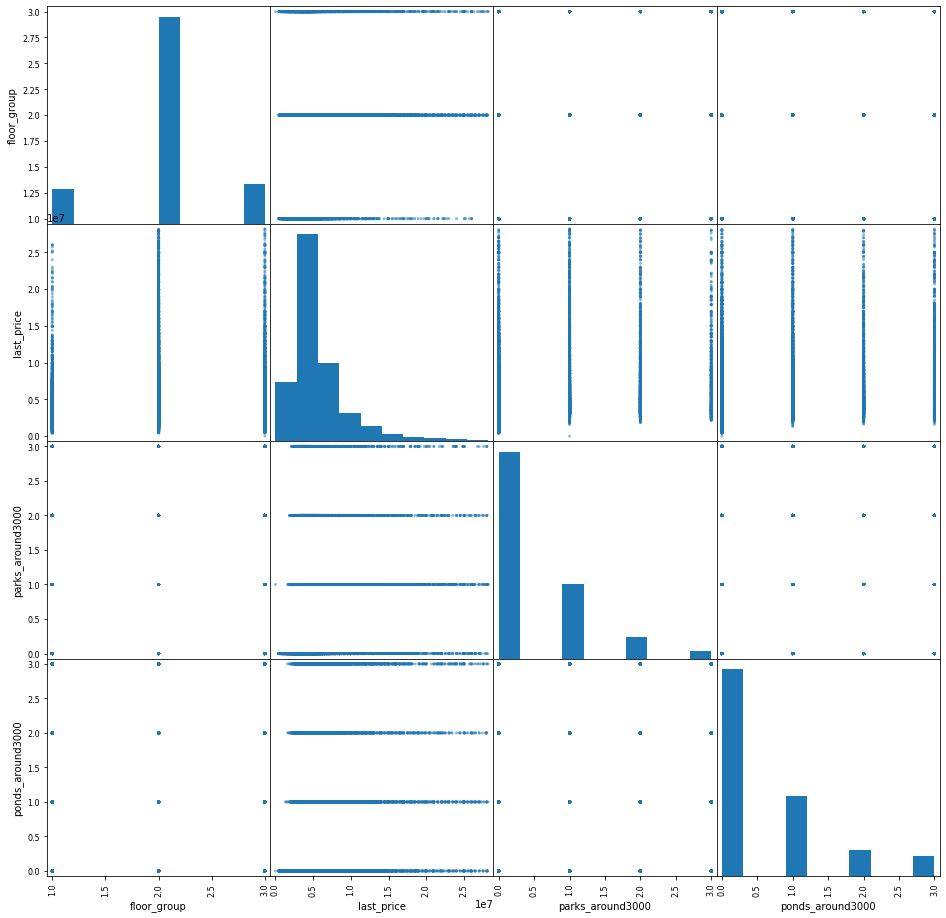

In [117]:
stat_multi2_good = df_last_price.pivot_table(index=df_last_price.index, values=['floor_group',
                      'parks_around3000', 'ponds_around3000', 'last_price'], aggfunc='mean')
print(stat_multi2_good.corr())
pd.plotting.scatter_matrix(stat_multi2_good, grid=30, figsize=(16,16))
plt.show()


<div style="border:solid green 2px; padding: 14px">

  <p> 
    Зависимость значений увеличилась.</p>
</div>


                        day_of_week_exposition  last_price  month_exposition  \
day_of_week_exposition                1.000000   -0.020204          0.012418   
last_price                           -0.020204    1.000000          0.001872   
month_exposition                      0.012418    0.001872          1.000000   
year_exposition                      -0.004649   -0.038030         -0.269482   

                        year_exposition  
day_of_week_exposition        -0.004649  
last_price                    -0.038030  
month_exposition              -0.269482  
year_exposition                1.000000  


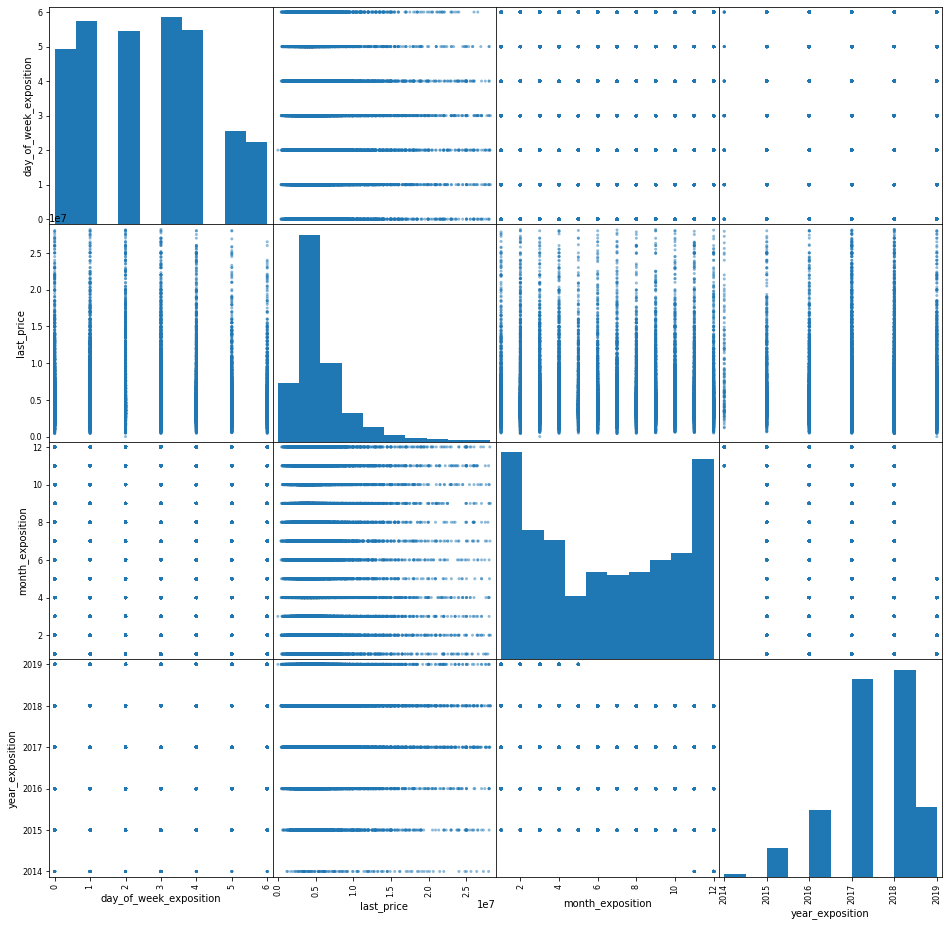

In [118]:
stat_multi3_good = df_last_price.pivot_table(index=df_last_price.index, values=['last_price', 
           'day_of_week_exposition', 'month_exposition', 'year_exposition'], aggfunc='mean')
print(stat_multi3_good.corr())
pd.plotting.scatter_matrix(stat_multi3_good, figsize=(16,16))
plt.show()

 <div style="border:solid green 2px; padding: 14px">
<h3> 
Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.
    </h3>
    <p> 
    </p>
</div>

In [119]:
print('Средняя цена за кв.м. = {:.2f}'.format(price_kv_m_mean))

Средняя цена за кв.м. = 99421.66


 <div style="border:solid green 2px; padding: 14px">
    <p> Найдем зависимость цены за кв.м. от этажа. Подготовим таблицу
    </p>
</div>

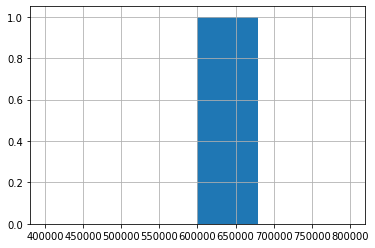

In [120]:
df_last_price['price_kv_m'].hist(range=(400000,800000))
plt.show()

In [121]:
df_last_price = df_last_price.drop(df_last_price[df_last_price['price_kv_m']>400000].
                                                index,axis=0)

0.043377915062115184


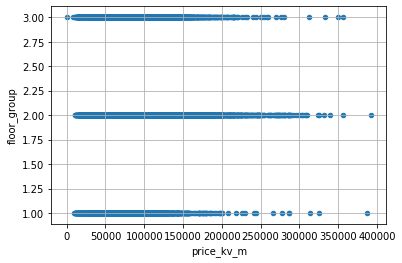

In [122]:
print(df_last_price['price_kv_m'].corr(df_last_price['floor_group']))
df_last_price.plot(x='price_kv_m', y='floor_group', kind='scatter', grid=True)
plt.show()

<div style="border:solid green 2px; padding: 14px">

  <p> 
    Я не вижу зависимости. Корреляция всего 0.04
</p>
</div>


 <div style="border:solid green 2px; padding: 14px">
    <p> Найдем зависимость цены за кв.м. от других параметров.
    </p>
</div>

In [123]:
df_kvm_price = df_last_price.query('price_kv_m<200000')

                     cityCenters_nearest  floor_group  price_kv_m     rooms
cityCenters_nearest             1.000000    -0.013394   -0.605772 -0.179265
floor_group                    -0.013394     1.000000    0.042503  0.013606
price_kv_m                     -0.605772     0.042503    1.000000 -0.094426
rooms                          -0.179265     0.013606   -0.094426  1.000000


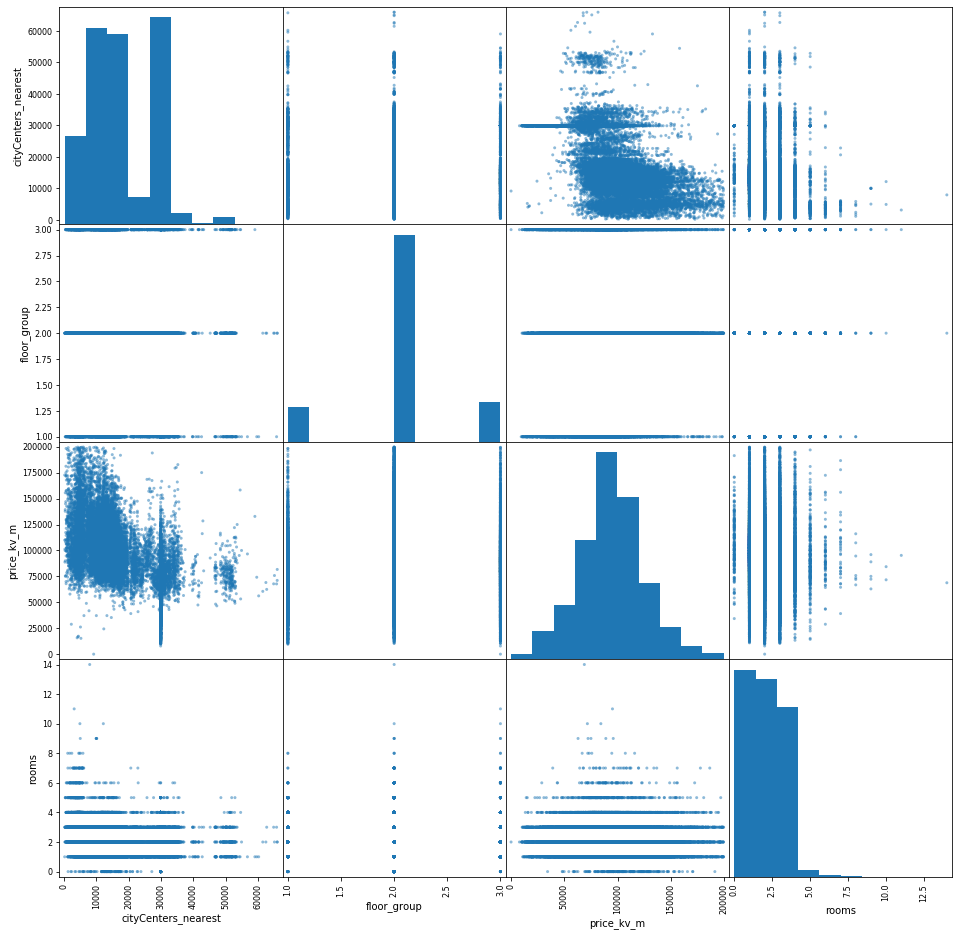

In [124]:
stat_good_kv_m = df_kvm_price.pivot_table(index=df_kvm_price.index, values=['price_kv_m', 
                        'rooms', 'floor_group', 'cityCenters_nearest'], aggfunc='mean')
print(stat_good_kv_m.corr())
pd.plotting.scatter_matrix(stat_good_kv_m, figsize=(16,16))
plt.show()

<div style="border:solid green 2px; padding: 14px">

  <p> 
    Зависимости между ценой за кв.м. и количеством комнат не обнаружено. Расстояние до центра оказывает небольшое влияние
</p>
</div>



                        day_of_week_exposition  month_exposition  price_kv_m  \
day_of_week_exposition                1.000000          0.012352   -0.015844   
month_exposition                      0.012352          1.000000   -0.004003   
price_kv_m                           -0.015844         -0.004003    1.000000   
year_exposition                      -0.004478         -0.269429    0.044639   

                        year_exposition  
day_of_week_exposition        -0.004478  
month_exposition              -0.269429  
price_kv_m                     0.044639  
year_exposition                1.000000  


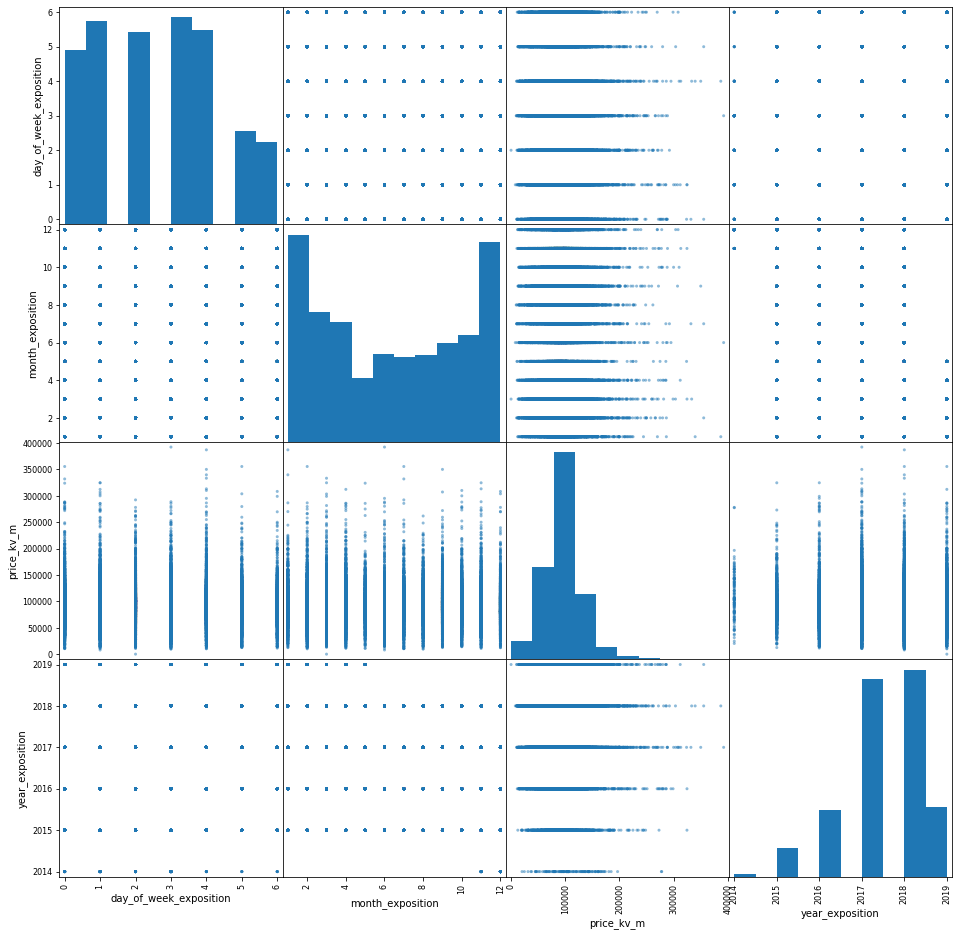

In [125]:
stat_good_kv_m2 = df_last_price.pivot_table(index=df_last_price.index, values=['price_kv_m',
            'day_of_week_exposition', 'month_exposition', 'year_exposition'], aggfunc='mean')
print(stat_good_kv_m2.corr())
pd.plotting.scatter_matrix(stat_good_kv_m2, figsize=(16,16))
plt.show()

<div style="border:solid green 2px; padding: 14px">

  <p> 
    Зависимости между ценой за кв.м. и днем, месяцем, годом не обнаружено. Коррляция нулевая.
</p>
</div>


 <div style="border:solid green 2px; padding: 14px">
    <h3> Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.
    </h3>
</div>

In [126]:
data_area_price = df_last_price.query('(locality_name!="Санкт-Петербург") & (locality_name!="UnnameCity")')
data_10 = data_area_price['locality_name'].value_counts().head(10)
#Количество квартир в первой десятке от 201 на город

#запишем в data_area_10 квартиры, находящиеся в городах - десятке лидеров продажи
data_area_10 = data_area_price[data_area_price['locality_name'].isin(data_10.index)]

good_stat = data_area_10.pivot_table(index='locality_name', values='price_kv_m', aggfunc='mean')
good_stat

,price_kv_m
locality_name,
Всеволожск,67213.785894
Выборг,58141.489451
Гатчина,68745.693811
Деревня Кудрово,92473.086957
Колпино,75332.866469
Петергоф,84757.104478
Посёлок Мурино,85751.733716
Посёлок Парголово,90175.489297
Посёлок Шушары,78676.904545


In [127]:
print('Средняя цена за кв.м. = {:.2f}'.format(price_kv_m_mean))

price_kv_m_mean_area = df_last_price.query('(locality_name!="Санкт-Петербург")')['price_kv_m'].mean()
print('Средняя цена за кв.м. в пригородах = {:.2f}'.format(price_kv_m_mean_area))

price_kv_m_mean_area_10 = good_stat['price_kv_m'].mean()
print('Средняя цена за кв.м. в пригородах-лидерах продаж = {:.2f}'.format(price_kv_m_mean_area_10))

price_kv_m_mean_spb = df_last_price[df_last_price['locality_name']=="Санкт-Петербург"]['price_kv_m'].mean()
print('Средняя цена за кв.м. в Санкт-Петербурге = {:.2f}'.format(price_kv_m_mean_spb))

Средняя цена за кв.м. = 99421.66
Средняя цена за кв.м. в пригородах = 68759.91
Средняя цена за кв.м. в пригородах-лидерах продаж = 80391.24
Средняя цена за кв.м. в Санкт-Петербурге = 110201.55




<div style="border:solid green 2px; padding: 14px">

  <p> 
Цена за кв.м. ожидаемо выше в СПб, составляет 110201.55, цена за кв.м. в пригородах делится на 2 группы: в крупных пригородах средняя цена за кв.м. = 80391.24 и в мелких = 68759.91
</p>
</div>



 <div style="border:solid green 2px; padding: 14px">
<h3> 
    Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.
    </h3>
  </div>

In [128]:
data_4000 = data.query('cityCenters_nearest < 4000') #1165
data_4000_8000 = data.query('cityCenters_nearest >= 4000 & cityCenters_nearest < 8000') #2563
data_8000_12000 = data.query('cityCenters_nearest >= 8000 & cityCenters_nearest < 12000') #3697
data_12000_16000 = data.query('cityCenters_nearest >= 12000 & cityCenters_nearest < 16000') #11323
data_16000_20000 = data.query('cityCenters_nearest >= 16000 & cityCenters_nearest < 20000') #2319
data_20000 = data.query('cityCenters_nearest >= 20000') #2632

def segment_tip (segment):
    print('Интервал:', segment['cityCenters_nearest'].min(), '-', segment['cityCenters_nearest'].max())
    print('Среднее расстояние до центра- {:.2f}'.format(segment['cityCenters_nearest'].mean()))
    print('Среднее количество комнат - {:.2f}'.format(segment['rooms'].mean()))
    print('Медиана количества комнат - {:.2f}'.format(segment['rooms'].median()))
    print('Средняя общая площадь - {:.2f}'.format(segment['total_area'].mean()))
    
    segment1 = segment.pivot_table(index=segment.index, values=['last_price','cityCenters_nearest',
                                                            'rooms', 'total_area'], aggfunc='mean')
    print()
    print(segment1.corr())
    return()

In [129]:
print('Корреляция полной таблицы')
print(station_stat_multi.corr())

Корреляция полной таблицы
                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.269377 -0.204368   -0.270829
last_price                     -0.269377    1.000000  0.363343    0.653675
rooms                          -0.204368    0.363343  1.000000    0.758344
total_area                     -0.270829    0.653675  0.758344    1.000000


In [130]:
segment_tip(data_4000)

Интервал: 181.0 - 3996.0
Среднее расстояние до центра- 2604.89
Среднее количество комнат - 3.10
Медиана количества комнат - 3.00
Средняя общая площадь - 97.37

                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.094043 -0.051589   -0.109759
last_price                     -0.094043    1.000000  0.244491    0.532068
rooms                          -0.051589    0.244491  1.000000    0.757034
total_area                     -0.109759    0.532068  0.757034    1.000000


()

In [131]:
segment_tip(data_4000_8000)

Интервал: 4004.0 - 7998.0
Среднее расстояние до центра- 5634.62
Среднее количество комнат - 2.68
Медиана количества комнат - 3.00
Средняя общая площадь - 89.99

                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000    0.007096 -0.146846   -0.095605
last_price                      0.007096    1.000000  0.416500    0.754720
rooms                          -0.146846    0.416500  1.000000    0.733863
total_area                     -0.095605    0.754720  0.733863    1.000000


()

In [132]:
segment_tip(data_8000_12000)

Интервал: 8001.0 - 11999.0
Среднее расстояние до центра- 10358.94
Среднее количество комнат - 2.05
Медиана количества комнат - 2.00
Средняя общая площадь - 58.18

                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.184123 -0.059557   -0.145136
last_price                     -0.184123    1.000000  0.525419    0.836916
rooms                          -0.059557    0.525419  1.000000    0.772723
total_area                     -0.145136    0.836916  0.772723    1.000000


()

In [133]:
segment_tip(data_12000_16000)

Интервал: 12005.0 - 15999.0
Среднее расстояние до центра- 13950.97
Среднее количество комнат - 1.95
Медиана количества комнат - 2.00
Средняя общая площадь - 55.57

                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.085881 -0.019141   -0.026843
last_price                     -0.085881    1.000000  0.462637    0.807408
rooms                          -0.019141    0.462637  1.000000    0.723629
total_area                     -0.026843    0.807408  0.723629    1.000000


()

In [134]:
segment_tip(data_16000_20000)

Интервал: 16001.0 - 19942.0
Среднее расстояние до центра- 17337.65
Среднее количество комнат - 1.86
Медиана количества комнат - 2.00
Средняя общая площадь - 53.48

                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.124282 -0.132274   -0.069576
last_price                     -0.124282    1.000000  0.592355    0.857386
rooms                          -0.132274    0.592355  1.000000    0.771547
total_area                     -0.069576    0.857386  0.771547    1.000000


()

In [135]:
segment_tip(data_20000)

Интервал: 20160.0 - 65968.0
Среднее расстояние до центра- 30178.94
Среднее количество комнат - 1.88
Медиана количества комнат - 2.00
Средняя общая площадь - 52.05

                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.023851  0.039470   -0.011764
last_price                     -0.023851    1.000000  0.419360    0.728545
rooms                           0.039470    0.419360  1.000000    0.779416
total_area                     -0.011764    0.728545  0.779416    1.000000


()


<div style="border:solid green 2px; padding: 14px">

  <p> 

Корреляция заметно меняется в зависимости от расстояния от центра. Я  могу сделать вывод, что наиболее ярко выражена зависимость показателей цена-площадь/количество комнат, для квартир на расстоянии 8000 - 20000. Для самых ближних и дальних от центра квартир показатели ниже
</p>
</div>



 <div style="border:solid green 2px; padding: 14px">
<h3> 
    
Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.
    </h3>
</div>

In [136]:
data_apartment = data.query('is_apartment')
# Из особенностей я заметила этаж расположения часто первый или последний

                     cityCenters_nearest  floor_group  last_price     rooms  \
cityCenters_nearest             1.000000     0.028512   -0.474229 -0.157527   
floor_group                     0.028512     1.000000    0.315227  0.202286   
last_price                     -0.474229     0.315227    1.000000  0.399182   
rooms                          -0.157527     0.202286    0.399182  1.000000   
total_area                     -0.188359     0.354046    0.810846  0.594663   

                     total_area  
cityCenters_nearest   -0.188359  
floor_group            0.354046  
last_price             0.810846  
rooms                  0.594663  
total_area             1.000000  


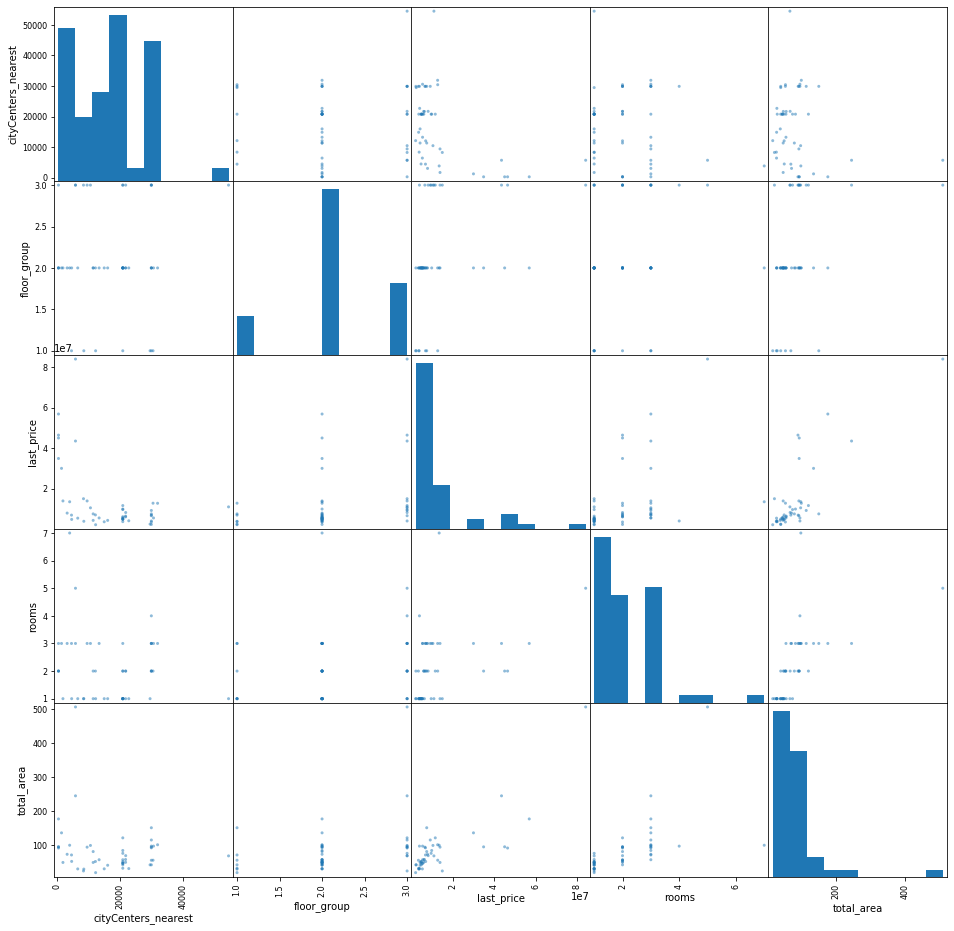

In [137]:
data_apartment_stat = data_apartment.pivot_table(index=data_apartment.index, values=['last_price','rooms',
                                            'total_area','floor_group', 'cityCenters_nearest'], aggfunc='mean')
print(data_apartment_stat.corr())
pd.plotting.scatter_matrix(data_apartment_stat, figsize=(16,16))
plt.show()

<div style="border:solid green 2px; padding: 14px">

  <p> 
   Наблюдается отрицательная корреляция цен с приближением к центру. Этаж имеет небольшое значение. Общая площадь имеет сильное влияние на цену. Количество комнат немного влияет тоже.
    </p>
</div>

In [138]:
data_apartment_stat.median()

cityCenters_nearest      20802.0
floor_group                  2.0
last_price             6900000.0
rooms                        2.0
total_area                  64.0
dtype: float64

In [139]:
data_studio = data.query('studio')

                     cityCenters_nearest  floor_group  last_price     rooms  \
cityCenters_nearest             1.000000     0.024704   -0.545942  0.090382   
floor_group                     0.024704     1.000000    0.133016  0.107297   
last_price                     -0.545942     0.133016    1.000000 -0.050364   
rooms                           0.090382     0.107297   -0.050364  1.000000   
total_area                     -0.330298     0.071220    0.853328 -0.011907   

                     total_area  
cityCenters_nearest   -0.330298  
floor_group            0.071220  
last_price             0.853328  
rooms                 -0.011907  
total_area             1.000000  


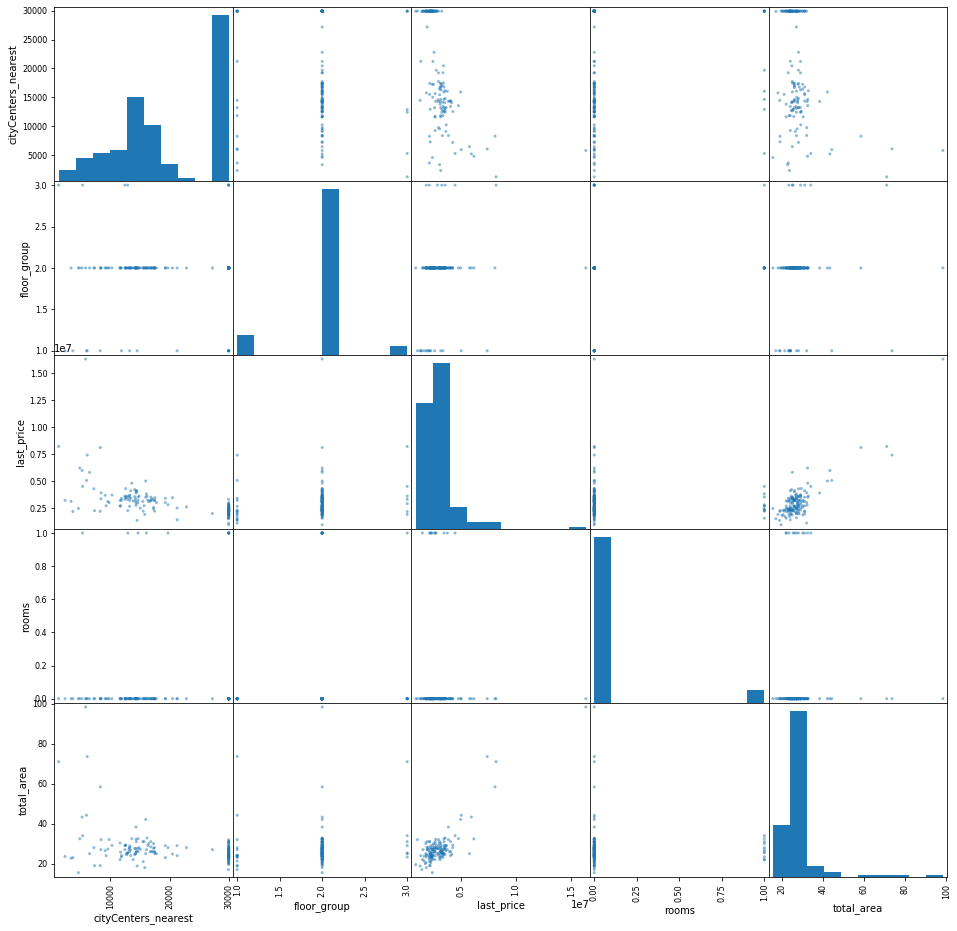

In [140]:
data_studio_stat = data_studio.pivot_table(index=data_studio.index, values=['last_price',
                                'floor_group', 'cityCenters_nearest','rooms','total_area'], aggfunc='mean')
print(data_studio_stat.corr())
pd.plotting.scatter_matrix(data_studio_stat, figsize=(16,16))
plt.show()

In [141]:
data_studio_stat.median()

cityCenters_nearest      16912.0
floor_group                  2.0
last_price             2750000.0
rooms                        0.0
total_area                  26.0
dtype: float64

In [142]:
data_open_plan = data.query('open_plan')


                     cityCenters_nearest  floor_group  last_price     rooms  \
cityCenters_nearest             1.000000     0.083208   -0.327414 -0.228579   
floor_group                     0.083208     1.000000   -0.007355 -0.055911   
last_price                     -0.327414    -0.007355    1.000000  0.388753   
rooms                          -0.228579    -0.055911    0.388753  1.000000   
total_area                     -0.281861     0.001194    0.959663  0.356634   

                     total_area  
cityCenters_nearest   -0.281861  
floor_group            0.001194  
last_price             0.959663  
rooms                  0.356634  
total_area             1.000000  


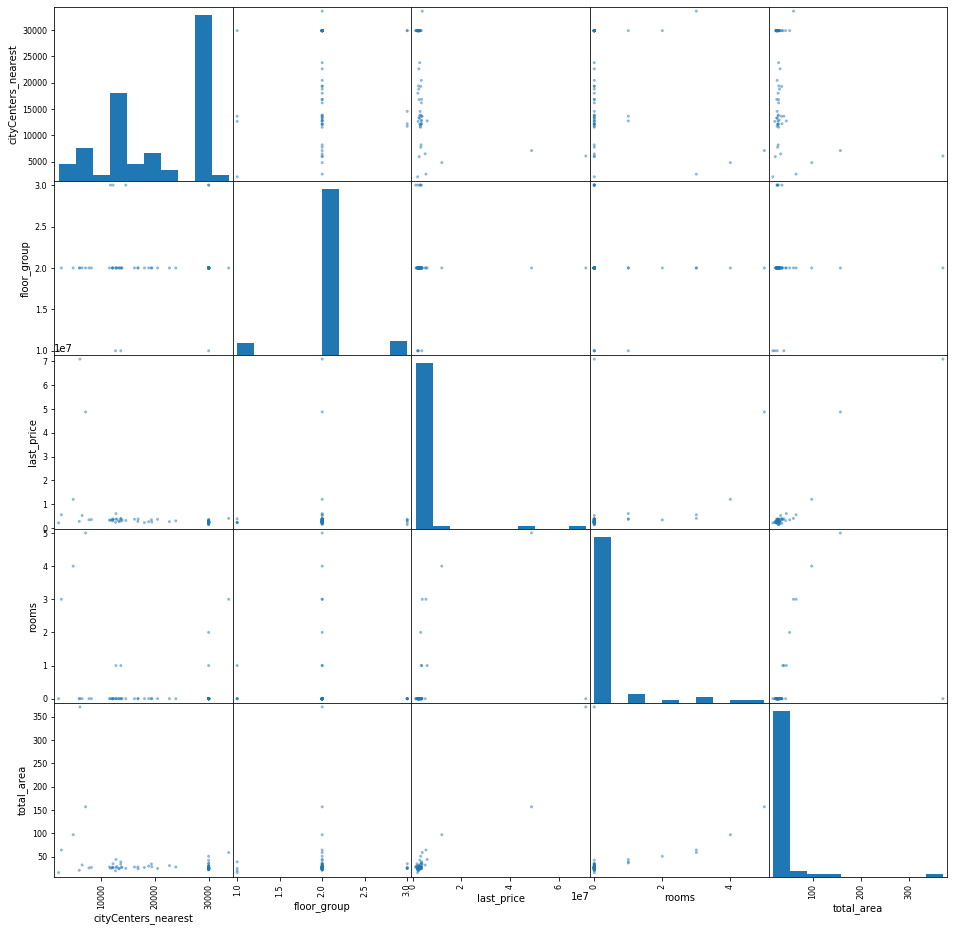

In [143]:
data_open_plan_stat = data_open_plan.pivot_table(index=data_open_plan.index, values=['last_price',
                                'floor_group', 'cityCenters_nearest','rooms','total_area'], aggfunc='mean')
print(data_open_plan_stat.corr())
pd.plotting.scatter_matrix(data_open_plan_stat, figsize=(16,16))
plt.show()

In [144]:
data_open_plan_stat.median()

cityCenters_nearest      20444.0
floor_group                  2.0
last_price             2730000.0
rooms                        0.0
total_area                  27.1
dtype: float64

In [145]:
data_individ = data.query('open_plan | studio | is_apartment')
data_tipovaja = data.drop(data_individ.index, axis=0)


                     cityCenters_nearest  floor_group  last_price     rooms  \
cityCenters_nearest             1.000000    -0.020825   -0.268424 -0.204608   
floor_group                    -0.020825     1.000000    0.057506  0.024558   
last_price                     -0.268424     0.057506    1.000000  0.364473   
rooms                          -0.204608     0.024558    0.364473  1.000000   
total_area                     -0.271059     0.062161    0.651928  0.761879   

                     total_area  
cityCenters_nearest   -0.271059  
floor_group            0.062161  
last_price             0.651928  
rooms                  0.761879  
total_area             1.000000  


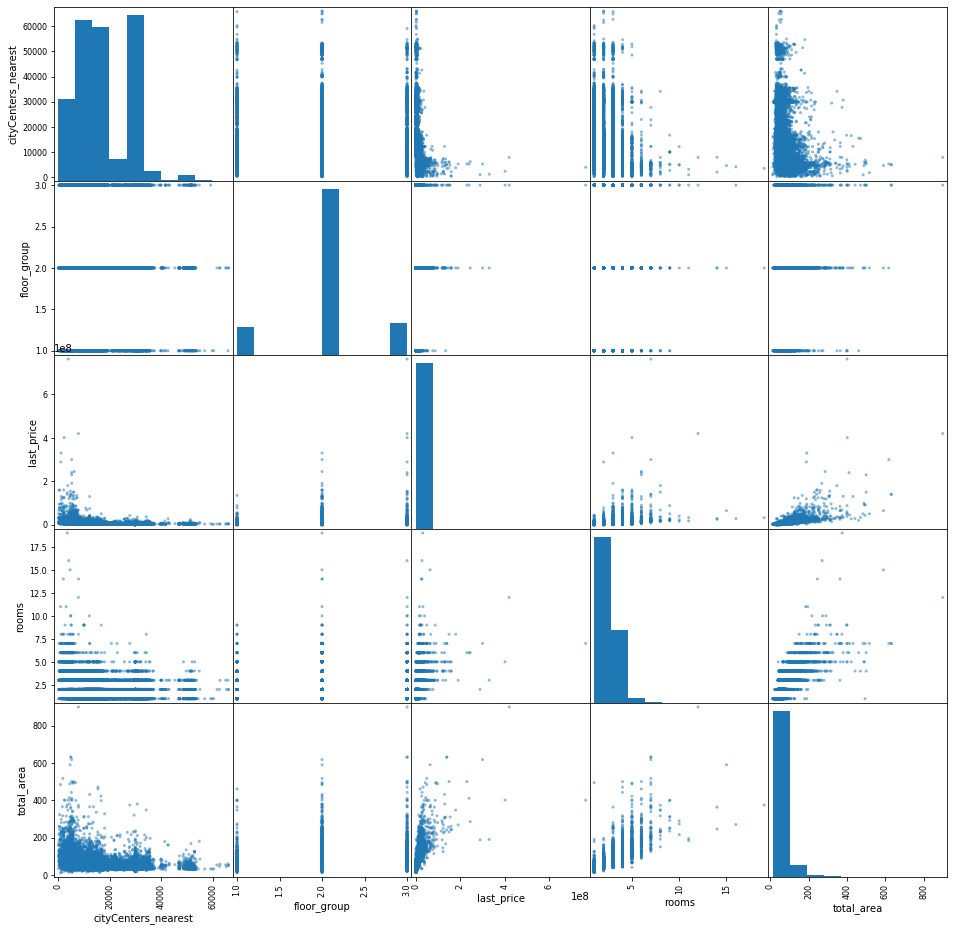

In [146]:
data_tipovaja_stat = data_tipovaja.pivot_table(index=data_tipovaja.index, values=['last_price',
                                'floor_group', 'cityCenters_nearest','rooms','total_area'], aggfunc='mean')
print(data_tipovaja_stat.corr())
pd.plotting.scatter_matrix(data_tipovaja_stat, figsize=(16,16))
plt.show()


<div style="border:solid green 2px; padding: 14px">

  <p> 
    Из особенностей можно выделить:
Для аппартаментов значимое влияние оказывает этаж, на котором находится квартира.
Для студии незначительным параметром является количество комнат.
Для квартир с открытой планировкой чрезвычайно высокое влияние оказывает общая площадь, для студии и аппартаментов этот показатель тоже высок, для типовых квартир он намного ниже.

Остальные показатели близки для разных типов квартир.
    </p>
</div>

<div style="border:solid green 2px; padding: 14px">

  <h6> 
   Теперь то же без выбросов
   </h6>
</div>

In [147]:
data_appartment_good = data_apartment_stat.drop(data_apartment_stat[data_apartment_stat['total_area']>120].
                                                index,axis=0)
data_appartment_good = data_appartment_good.drop(data_appartment_good[data_apartment_stat['last_price']>20000000].
                                                index,axis=0)

/Users/Alexander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


                     cityCenters_nearest  floor_group  last_price     rooms  \
cityCenters_nearest             1.000000     0.199094   -0.105701 -0.072026   
floor_group                     0.199094     1.000000    0.411839  0.177080   
last_price                     -0.105701     0.411839    1.000000  0.383289   
rooms                          -0.072026     0.177080    0.383289  1.000000   
total_area                      0.230562     0.496667    0.462013  0.732294   

                     total_area  
cityCenters_nearest    0.230562  
floor_group            0.496667  
last_price             0.462013  
rooms                  0.732294  
total_area             1.000000  


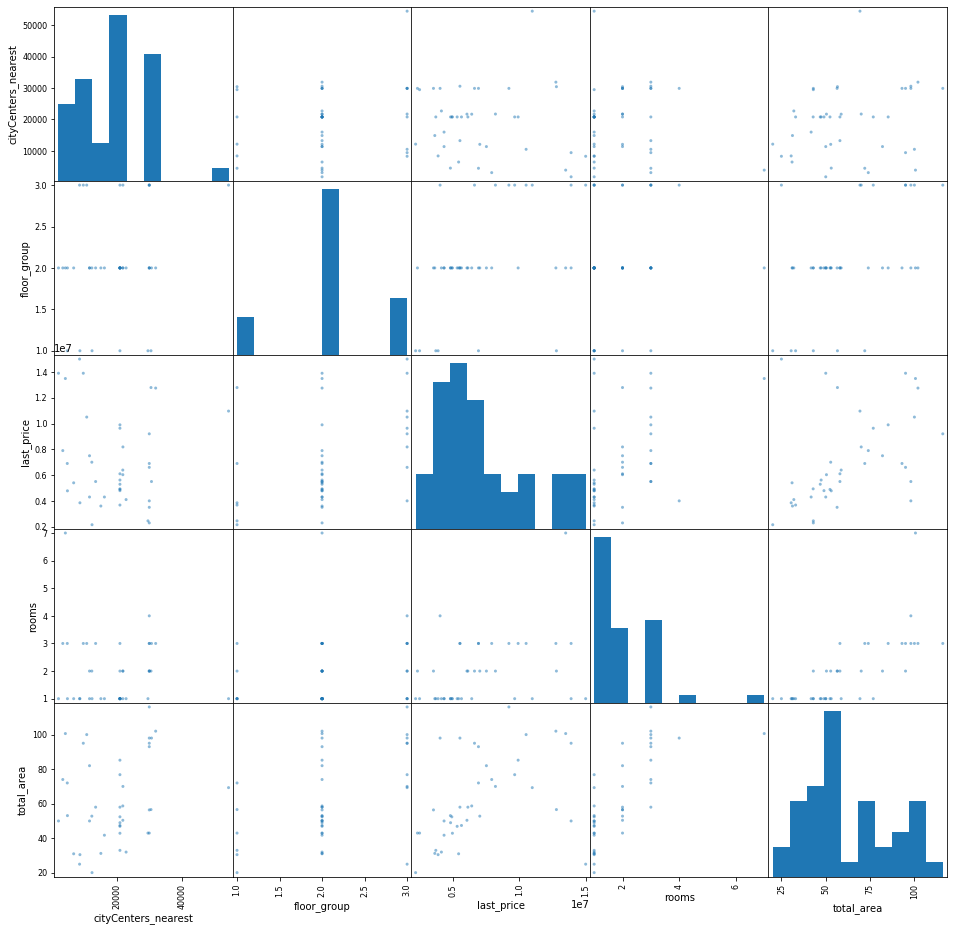

In [148]:
data_appartment_good_stat = data_appartment_good.pivot_table(index=data_appartment_good.index, values=['last_price','rooms',
                                            'total_area','floor_group', 'cityCenters_nearest'], aggfunc='mean')
print(data_appartment_good_stat.corr())
pd.plotting.scatter_matrix(data_appartment_good_stat, figsize=(16,16))
plt.show()

In [149]:
data_appartment_good_stat.median()

cityCenters_nearest      20802.0
floor_group                  2.0
last_price             6030000.0
rooms                        2.0
total_area                  56.4
dtype: float64

In [150]:
data_studio_good = data_studio_stat.drop(data_studio_stat[data_studio_stat['total_area']>40].
                                                index,axis=0)
data_studio_good = data_studio_good.drop(data_studio_good[data_studio_good['last_price']>10000000].
                                                index,axis=0)


                     cityCenters_nearest  floor_group  last_price     rooms  \
cityCenters_nearest             1.000000     0.018055   -0.643070  0.074968   
floor_group                     0.018055     1.000000    0.266872  0.112091   
last_price                     -0.643070     0.266872    1.000000 -0.012815   
rooms                           0.074968     0.112091   -0.012815  1.000000   
total_area                     -0.157414     0.242669    0.424135  0.102892   

                     total_area  
cityCenters_nearest   -0.157414  
floor_group            0.242669  
last_price             0.424135  
rooms                  0.102892  
total_area             1.000000  


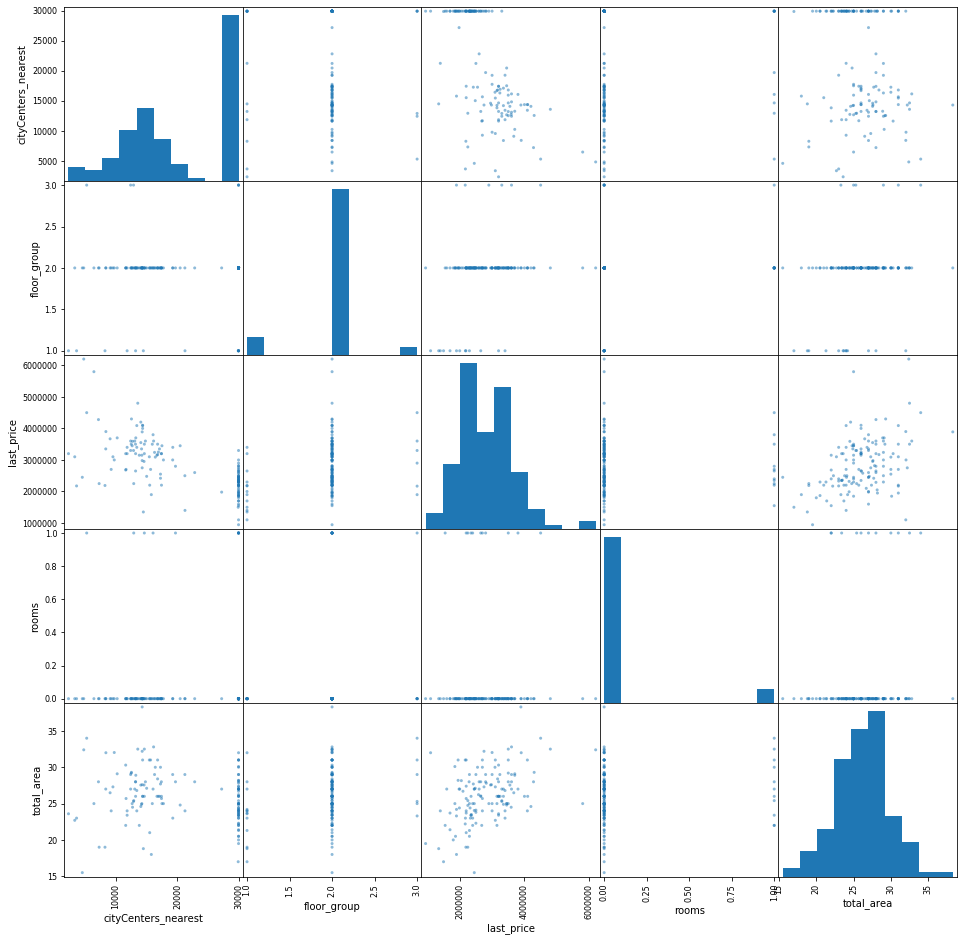

In [151]:
data_studio_good_stat = data_studio_good.pivot_table(index=data_studio_good.index, values=['last_price',
                                'floor_group', 'cityCenters_nearest','rooms','total_area'], aggfunc='mean')
print(data_studio_good_stat.corr())
pd.plotting.scatter_matrix(data_studio_good_stat, figsize=(16,16))
plt.show()

In [152]:
data_studio_good_stat.median()

cityCenters_nearest      17327.5
floor_group                  2.0
last_price             2700000.0
rooms                        0.0
total_area                  26.0
dtype: float64

In [153]:
data_open_plan_good = data_open_plan_stat.drop(data_open_plan_stat[data_open_plan_stat['total_area']>100].
                                                index,axis=0)
data_open_plan_good = data_open_plan_good.drop(data_open_plan_good[data_open_plan_good['last_price']>10807304].
                                                index,axis=0)


                     cityCenters_nearest  floor_group  last_price     rooms  \
cityCenters_nearest             1.000000     0.085336   -0.559622 -0.033063   
floor_group                     0.085336     1.000000    0.001936 -0.081329   
last_price                     -0.559622     0.001936    1.000000  0.503992   
rooms                          -0.033063    -0.081329    0.503992  1.000000   
total_area                     -0.036366     0.047871    0.582130  0.872973   

                     total_area  
cityCenters_nearest   -0.036366  
floor_group            0.047871  
last_price             0.582130  
rooms                  0.872973  
total_area             1.000000  


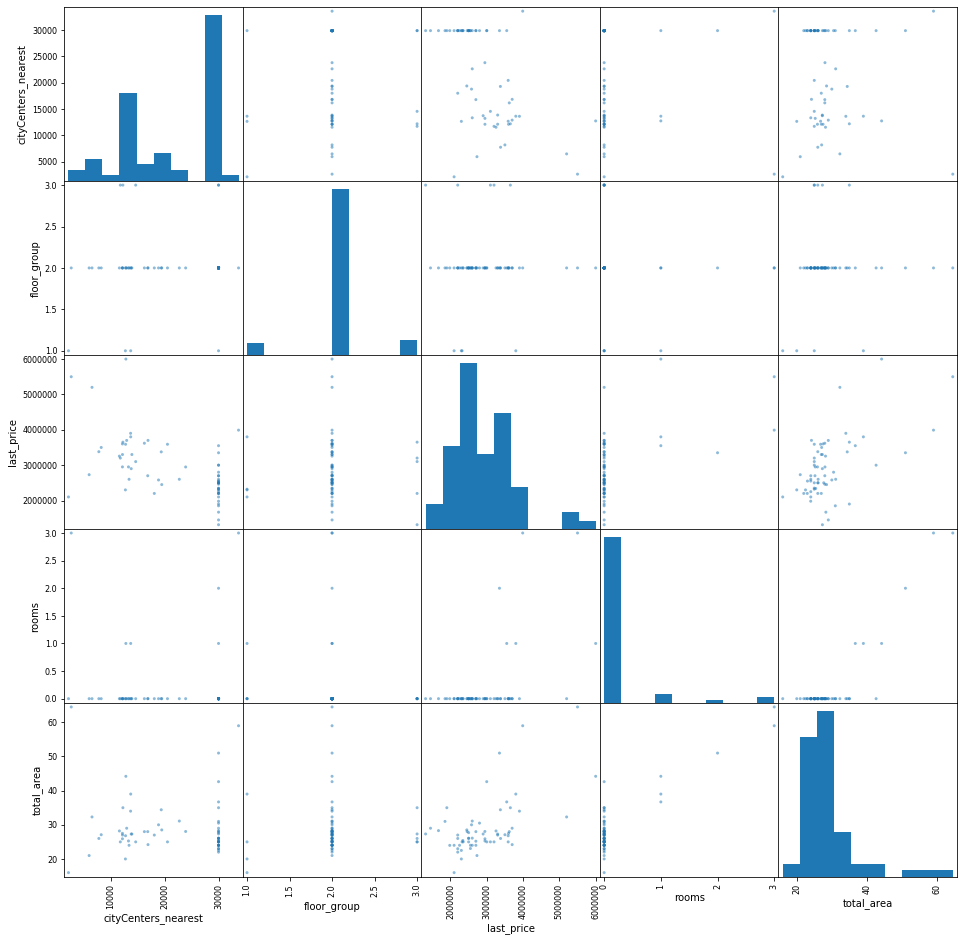

In [154]:
data_open_plan_good_stat = data_open_plan_good.pivot_table(index=data_open_plan_good.index, values=['last_price',
                                'rooms','total_area','floor_group', 'cityCenters_nearest'], aggfunc='mean')
print(data_open_plan_good_stat.corr())
pd.plotting.scatter_matrix(data_open_plan_good_stat, figsize=(16,16))
plt.show()

In [155]:
data_open_plan_good_stat.median()

cityCenters_nearest      23223.5
floor_group                  2.0
last_price             2700000.0
rooms                        0.0
total_area                  27.0
dtype: float64


<div style="border:solid green 2px; padding: 14px">

  <p> 
Без наибольших значений корреляция снижается и данные для всех типов квартир усредняются и становятся идентичными.
    </p>
</div>


 <div style="border:solid green 2px; padding: 14px">
<h3> 
    Вывод
    </h3>
    <p> 
       Проверила влияние площади, количества комнат, рсстояния до центра, этажа на стоимость квартир. Наиболее значимым является площадь. Это особенно явно для квартир со свободной планировкой, студий, аппартаментов. Кроме площади влияние на стоимость оказывают такие параметры6 как количество комнат, расстояние до центра. Причем в непосредственной близости (до 4000) - влияние ниже, чем в других интервалах расстояний. Интервал 4000 - 8000 и существенная удаленность более (20000) являются также менее влияющими на цену. 
    </p>
    <p> 
    Цена за кв.м. ожидаемо выше в СПб, составляет 110202, цена за кв.м. в пригородах делится на 2 группы: в крупных пригородах средняя цена за кв.м. = 80391 и в мелких = 68760
    </p>
</div>